In [1]:
pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-3ndbo5rm
  Running command git clone -q git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-3ndbo5rm
     |████████████████████████████████| 5.6 MB 8.2 MB/s 
     |████████████████████████████████| 117 kB 37.0 MB/s 
     |████████████████████████████████| 181 kB 62.2 MB/s 
     |████████████████████████████████| 76 kB 4.0 MB/s 
     |████████████████████████████████| 132 kB 62.3 MB/s 
     |████████████████████████████████| 32.8 MB 1.2 MB/s 
     |████████████████████████████████| 79 kB 8.3 MB/s 
     |████████████████████████████████| 8.6 MB 54.8 MB/s 
     |████████████████████████████████| 138 kB 73.6 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 5.1 MB 52.2 MB/s 
     |████████████████████████████████| 127 kB 65.6 MB/s 
  Created wheel for lucem-illud: filename=lucem_illud-8.0.1-py3-n

In [2]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
# import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <font color="red">*Exercise 1*</font>

<font color="red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the [MTurk slides on Canvas](https://canvas.uchicago.edu/courses/39937/files/6674661?wrap=1), or by hand with friends.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

I have performed annotation survey of such that people watch 30 conversations of two who have eventually got married or dated and they evaluate the sentiment of conversation to an extent of {1: their relationship is never going to be intimate, 2: their relationship might be going to be intimate. 3: their relationshi is going to be intimate or is already intimate.}. 

In [4]:
path = '/content/drive/MyDrive/class_content_analysis/annotation_test.txt'
with open(path, 'r') as f: 
   lines = f.readlines() 
result= []
for line in lines:
  s_array = []
  num = line.replace(',','')
  num = num.replace('\n', '')
  if len(num) == 3:
    continue
  if len(num) == 4:
    num = num[1:]
  if len(num) == 5:
    num = num[2:]
  s_array.append(int(num[0]))
  s_array.append(int(num[1]))
  s_array.append(int(num[2]))
  result.append(s_array)

anno = AnnotationsContainer.from_array(result, missing_values=[-1])


In [5]:
pyanno.measures.agreement.labels_frequency(anno.annotations,3)

array([0.33333333, 0.51111111, 0.15555556])

[[ 7.  0.  0.]
 [ 2. 17.  0.]
 [ 0.  0.  4.]]


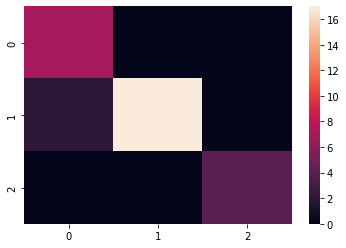

In [6]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],3)
print(c)
ac = seaborn.heatmap(c)
plt.show()

In [7]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

0.8790322580645161

In [8]:
fleiss_kappa(anno.annotations[::])

0.30032733224222585

In [9]:
krippendorffs_alpha(anno.annotations[::])

0.3992980561555076

In [10]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.8795180722891567

In [11]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

[[1.         0.87951807 0.08163265]
 [0.87951807 1.         0.06896552]
 [0.08163265 0.06896552 1.        ]]


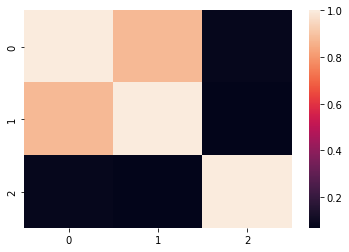

In [12]:
ax = seaborn.heatmap(m)
plt.show()

In [13]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

0.34337208086392024

In [14]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.8932384341637011

In [15]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.38309705527178933

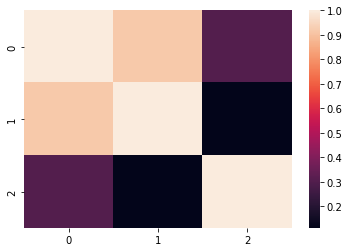

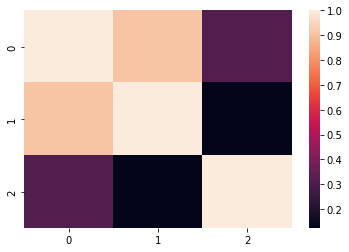

In [16]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

In [17]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

0.4456893760398512 0.4485948671465574


**As we could see, agreement among observers is pretty high with Cohen's  𝜅 = 0.879. Its confusion matrix and Scott's  𝜋 also convice us the high agreement.**
**Correlation of each value suggests that 0-1 has high correlation but 2-1 and 2-0 have low correlation.** 

**Based on the analysis above, we could  tell that this annotation has enough reliability**

## <font color="red">*Exercise 2*</font>

<font color="red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<font color="red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

In [18]:
def targetSplit(noise = 0, numPerCategory = 500, innerRad = .3):
    def genPoint(cat):
        if cat == 0:
            r = np.random.random_sample() * innerRad + (1 - innerRad) * np.random.random_sample() * noise
        else:
            r = np.random.random_sample() * (1 - innerRad) + innerRad - innerRad * np.random.random_sample() * noise
        eta = 2 * np.pi * np.random.random_sample()
        return np.array([r * np.cos(eta), r * np.sin(eta)])

    datDict = {
        'vect' : [genPoint(i % 2) for i in range(2 * numPerCategory)],
        'category' : [i % 2 for i in range(2 * numPerCategory)],
    }

    return pandas.DataFrame(datDict)


In [19]:
noise = .2
dfTrain, dfTest = sklearn.model_selection.train_test_split(lucem_illud.targetSplit(noise), test_size=.2)



In [20]:
import sklearn.naive_bayes

In [21]:
#Bayes
bayes = sklearn.naive_bayes.GaussianNB()

#Analogizes
svm_l = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
svm_p = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
k_n = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
log_reg = sklearn.linear_model.LogisticRegression()

#Symbolists
tree = sklearn.tree.DecisionTreeClassifier()
rand = sklearn.ensemble.RandomForestClassifier()

#Connectionists
mlp = sklearn.neural_network.MLPClassifier()

#Ensemble
grad = sklearn.ensemble.GradientBoostingClassifier()

name_dir = {
            bayes : 'Bayes',
            svm_l : 'linear SVM',
            svm_p : 'poly SVM',
            k_n : 'K neighbors',
            log_reg : 'Logistic Regression',
            tree : 'Decision tree',
            rand : 'Random Forest',
            mlp : 'MLP',
            grad : 'Gradient Boosting',
            }
lst_model = [bayes, svm_l, svm_p, k_n, log_reg, tree, rand, mlp, grad]


In [22]:
for model in lst_model:
  clf = model
  clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
  print('The evaluation of ', name_dir[model])
  print(lucem_illud.evaluateClassifier(clf, dfTest))
  print('----------------------------------------------------------------------------------')

The evaluation of  Bayes
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.11  0.890756   0.858491           0.832170  0.928571
1               0.11  0.890756   0.925532           0.864424  0.852941
----------------------------------------------------------------------------------
The evaluation of  linear SVM
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.395  0.610944   0.559748           0.553343  0.908163
1              0.395  0.610944   0.780488           0.594859  0.313725
----------------------------------------------------------------------------------
The evaluation of  poly SVM
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.425  0.583333   0.535519

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


The ROC of  Bayes


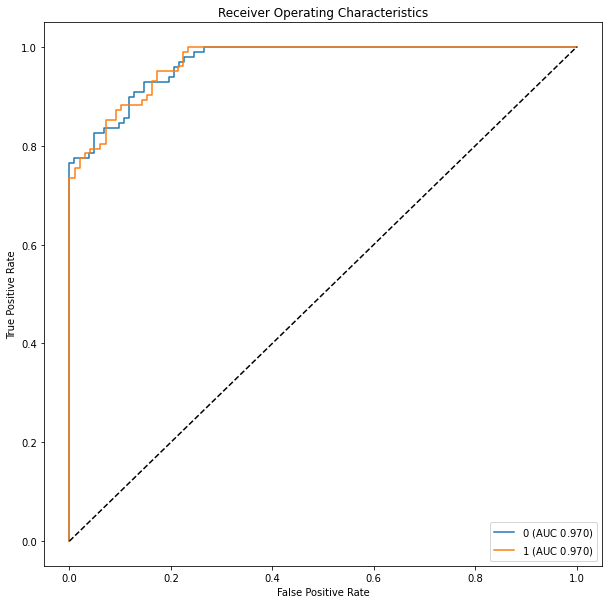

The ROC of  linear SVM


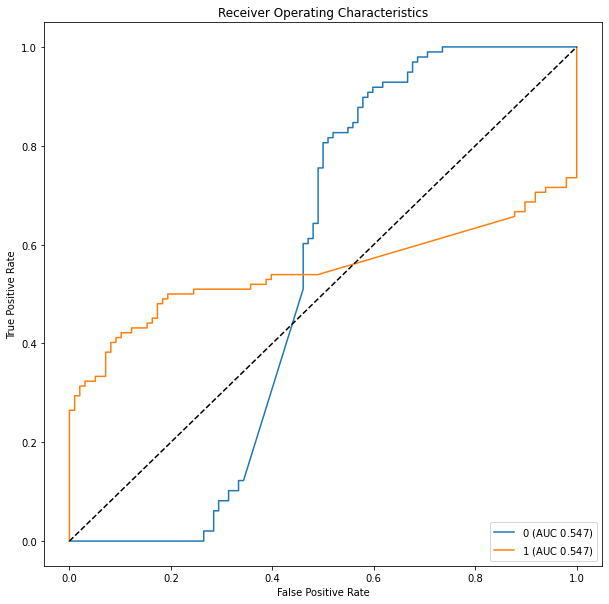

The ROC of  poly SVM


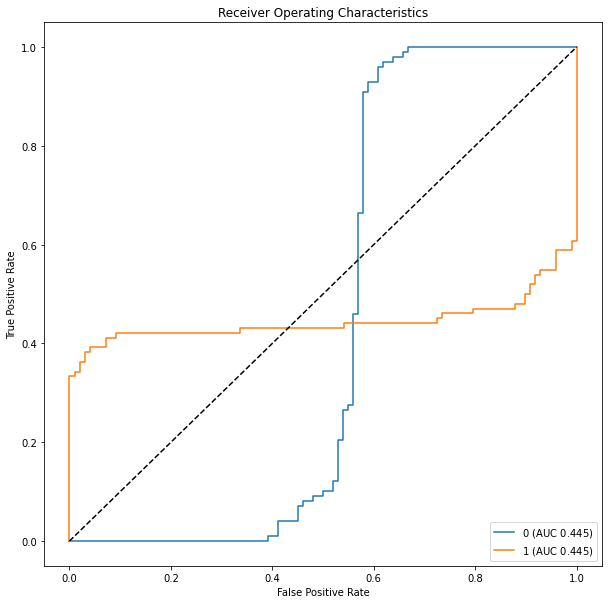

The ROC of  K neighbors


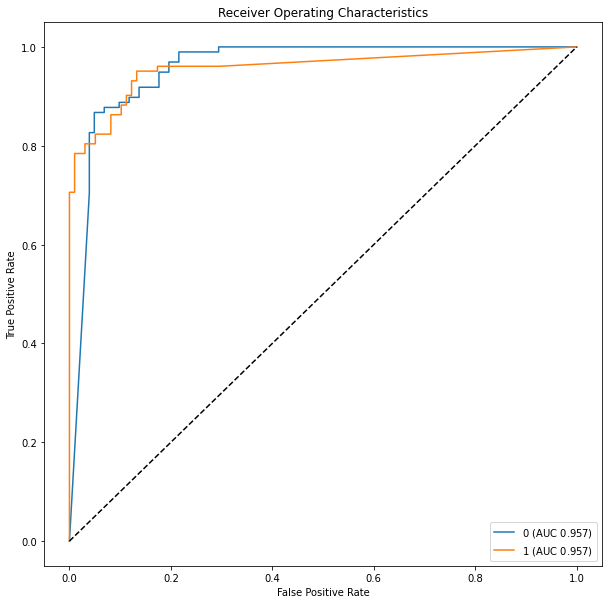

The ROC of  Logistic Regression


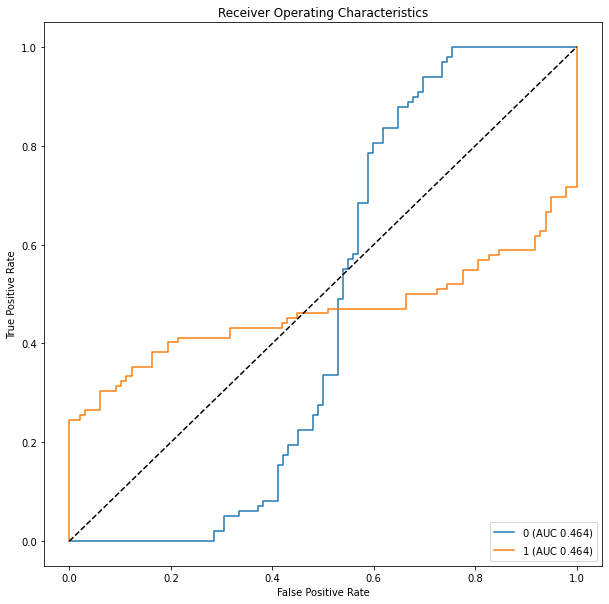

The ROC of  Decision tree


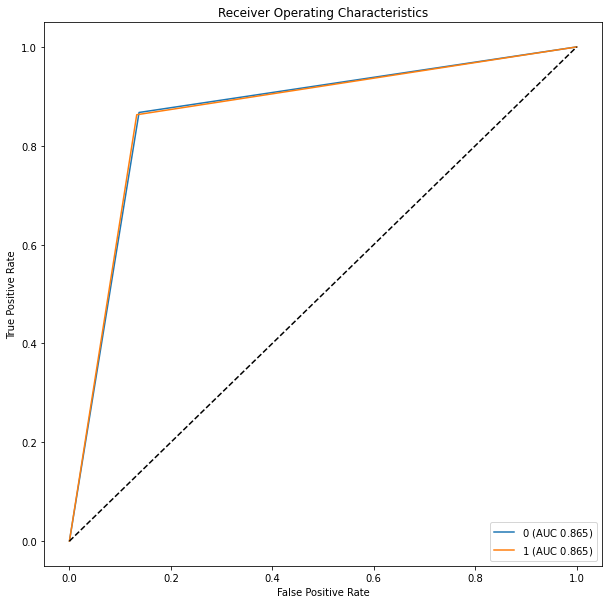

The ROC of  Random Forest


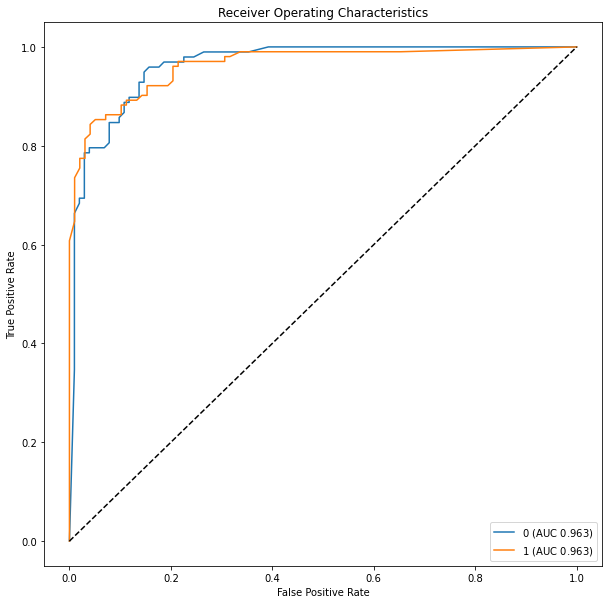

The ROC of  MLP


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


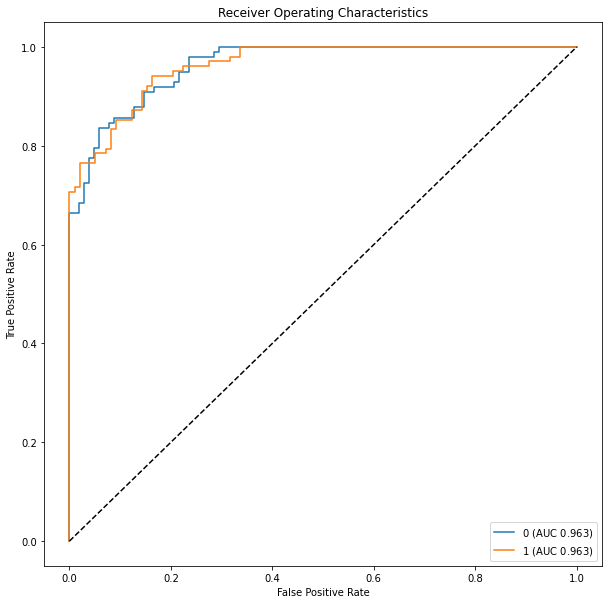

The ROC of  Gradient Boosting


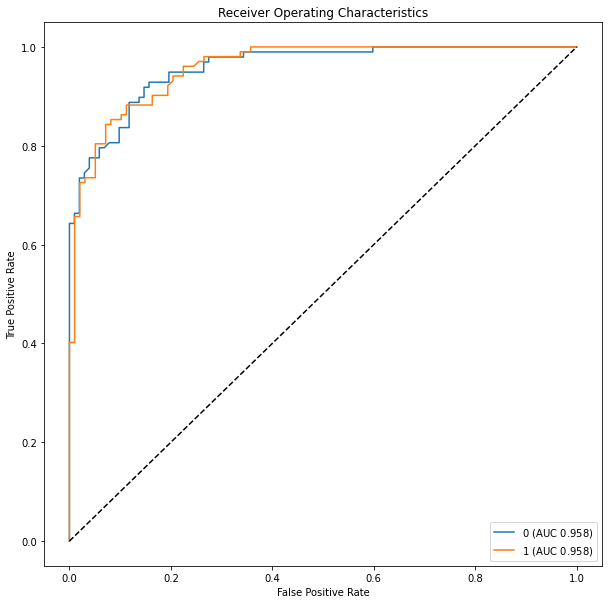

In [23]:
for model in lst_model:
  clf = model
  clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
  print('The ROC of ', name_dir[model])
  lucem_illud.plotMultiROC(clf, dfTest)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The plot of  Bayes


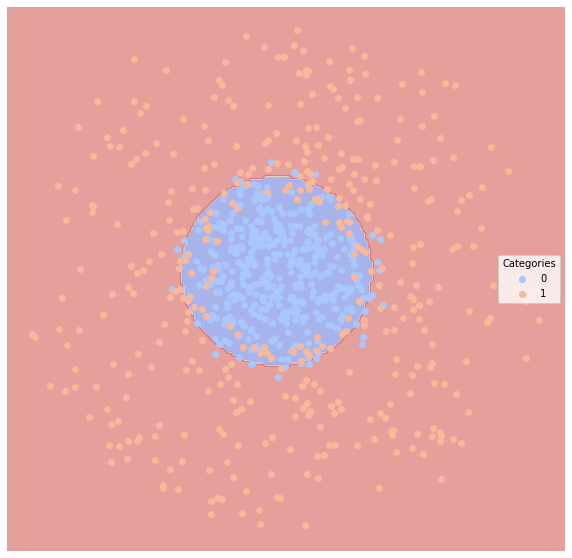

The plot of  linear SVM


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


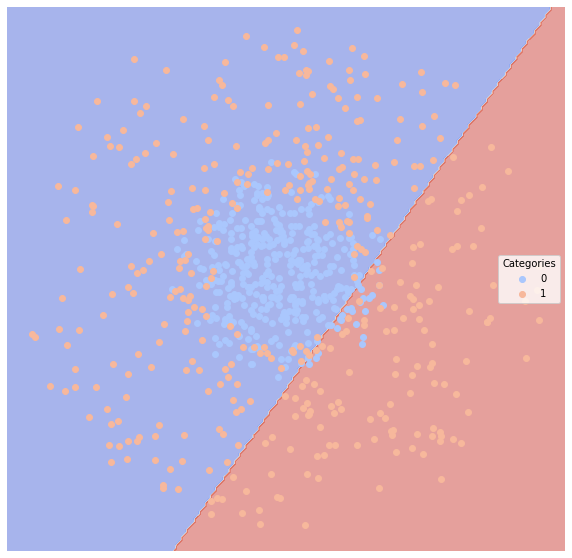

The plot of  poly SVM


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


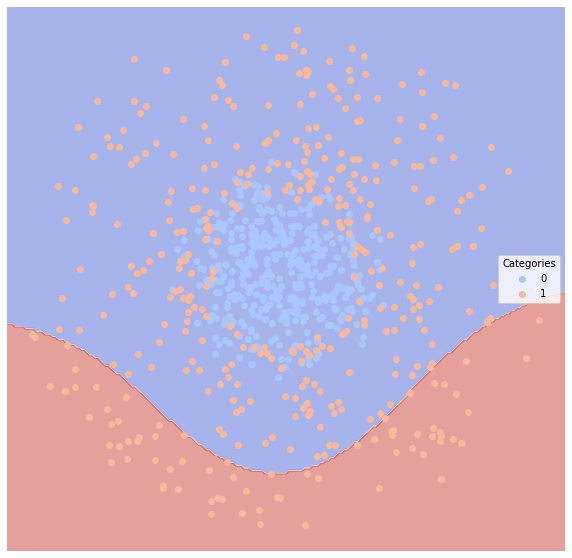

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The plot of  K neighbors


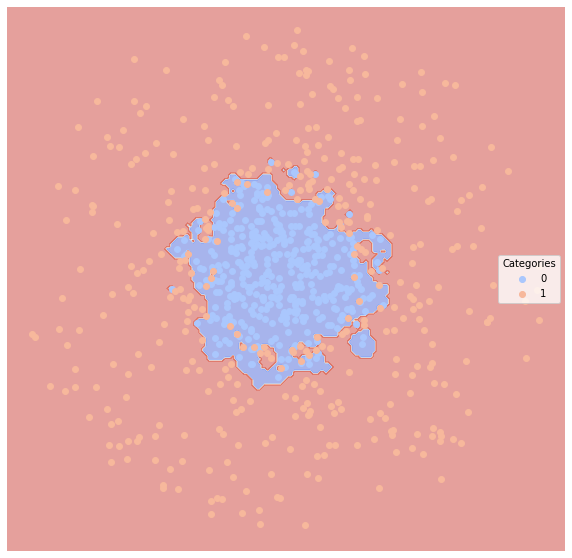

The plot of  Logistic Regression


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


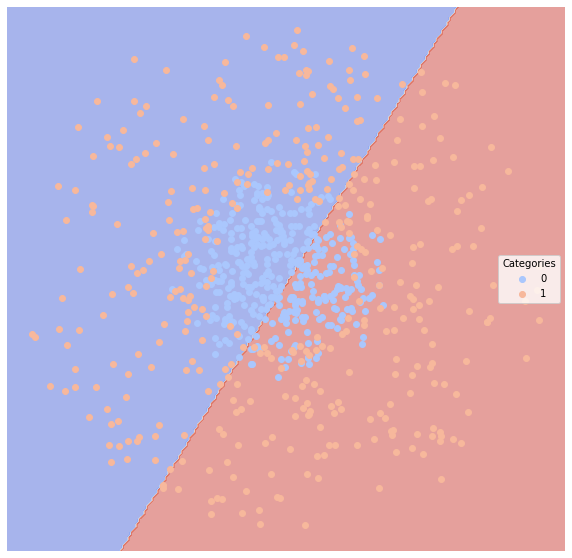

The plot of  Decision tree


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


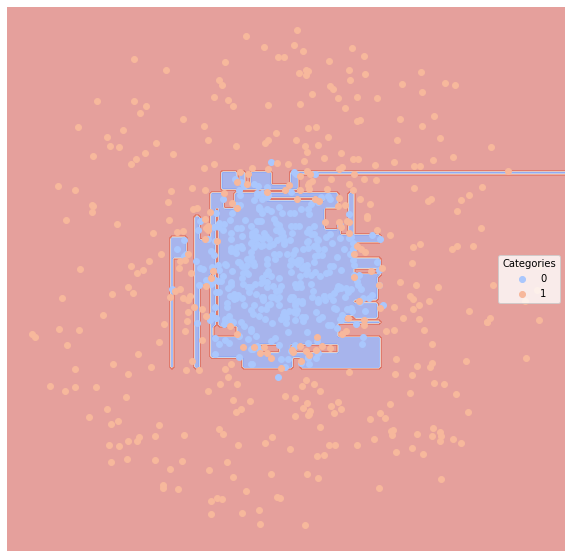

The plot of  Random Forest


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


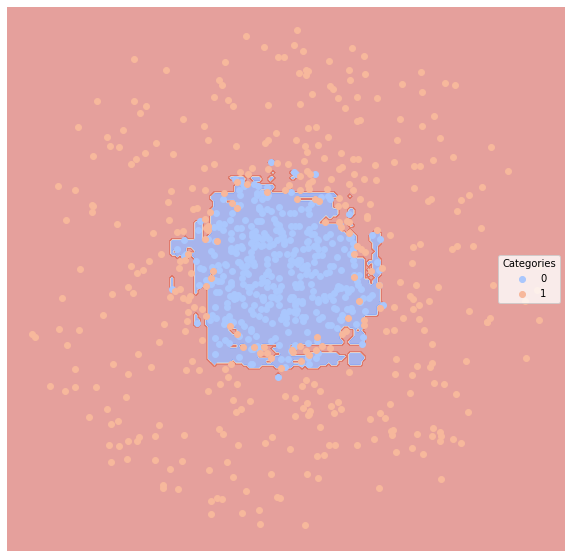

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The plot of  MLP


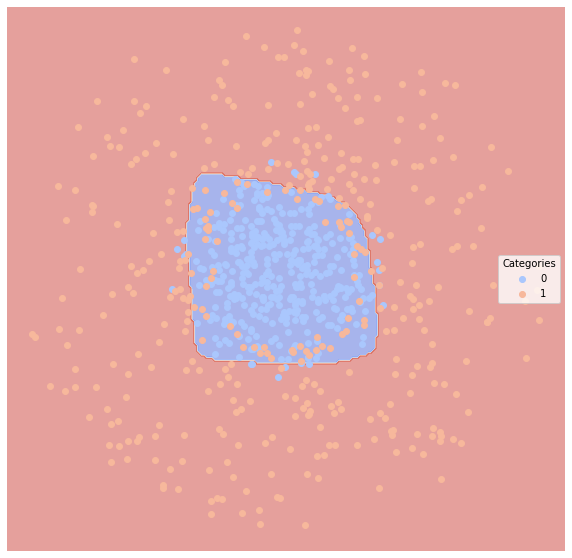

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The plot of  Gradient Boosting


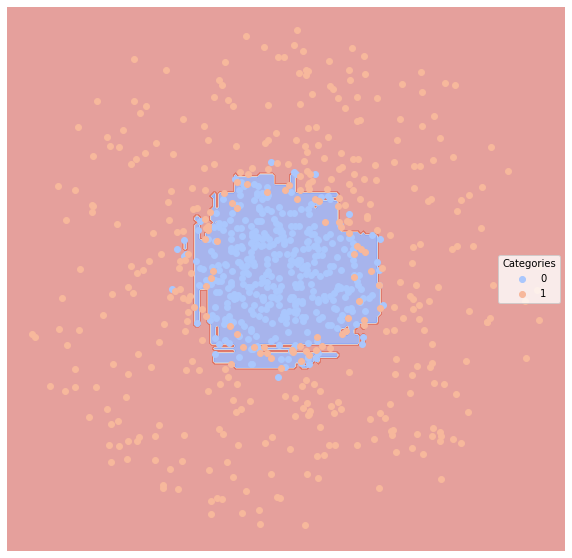

In [24]:
for model in lst_model:
  clf = model
  clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
  print('The plot of ', name_dir[model])
  lucem_illud.plotregions(clf, dfTrain)

As we could see above, Gradient Boosting, MLP, and k-neighbors methods work well. Among them, Gradient Boosting yields the best precision and AUC.

In [25]:
%cd "/content/drive/My Drive/class_content_analysis/supplement"

/content/drive/My Drive/class_content_analysis/supplement


In [27]:
##Colab crushed when I load senate large dataset so I removed that
dfTrain1, dfTest1 = sklearn.model_selection.train_test_split(lucem_illud.loadReddit(), test_size=.2)
dfTrain2, dfTest2 = sklearn.model_selection.train_test_split(lucem_illud.loadNewsGroups(), test_size=.2)
dfTrain3, dfTest3 = sklearn.model_selection.train_test_split(lucem_illud.loadSenateSmall(), test_size=.2)
dfTrain4, dfTest4 = sklearn.model_selection.train_test_split(lucem_illud.loadSpam(), test_size=.2)

lst_data = [[dfTrain1,dfTest1], [dfTrain2, dfTest2], [dfTrain3, dfTest3],[dfTrain4, dfTest4]]
name_data = {
            1: 'Reddit',
            2: 'News Group',
            3: 'Senate',
            4: 'Spam'
            }

Loading Reddit data
Converting to vectors
Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors
Loading Spam
Loading Ham
Converting to vectors


In [28]:
for i, data in enumerate(lst_data):
  print('------------------ Dataset of ', name_data[i+1],'-------------------')
  dfTrain, dfTest = data[0], data[1]
  for model in lst_model:
    clf = model
    print('The evaluation of ', name_dir[model])
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(lucem_illud.evaluateClassifier(clf, dfTest))
    print('***************************')

------------------ Dataset of  Reddit -------------------
The evaluation of  Bayes
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Bad Roommates              0.153125  0.770476   0.691176           0.520637   
Relationships              0.171875  0.697045   0.723404           0.454878   
Tales From Tech Support    0.096875  0.842924   0.970588           0.764928   
Weeaboo Tales              0.215625  0.845583   0.518248           0.506613   

                           Recall  
Category                           
Bad Roommates            0.626667  
Relationships            0.447368  
Tales From Tech Support  0.694737  
Weeaboo Tales            0.959459  
***************************
The evaluation of  linear SVM
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Bad Roomma

------------------ Dataset of  Reddit -------------------
The ROC of  Bayes


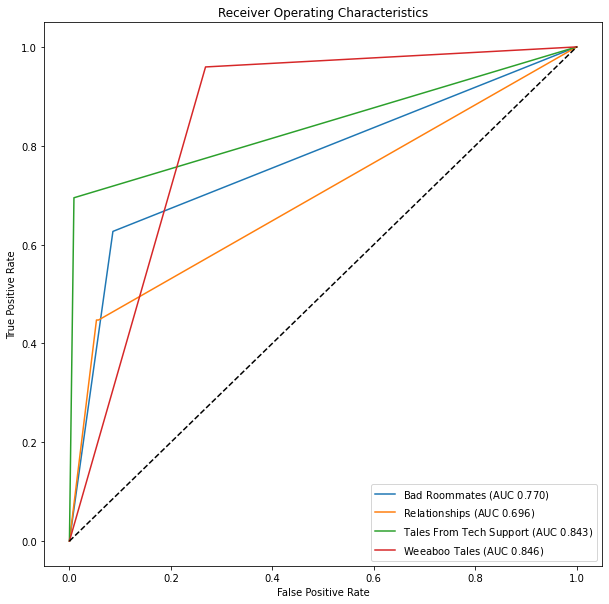

****************************************************
The ROC of  linear SVM


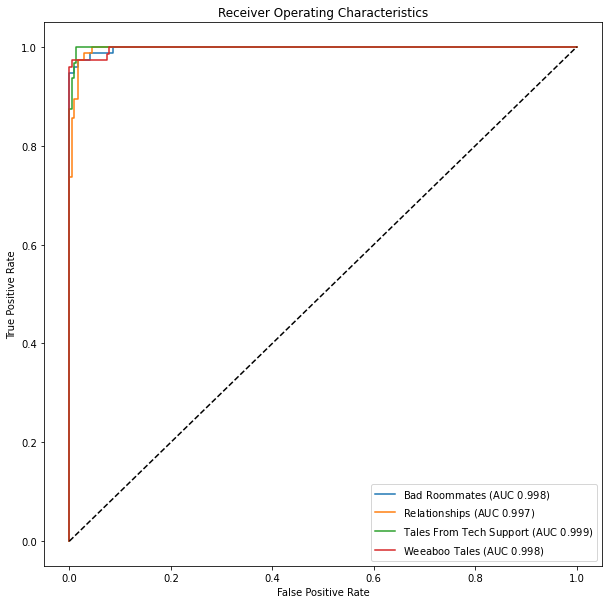

****************************************************
The ROC of  poly SVM


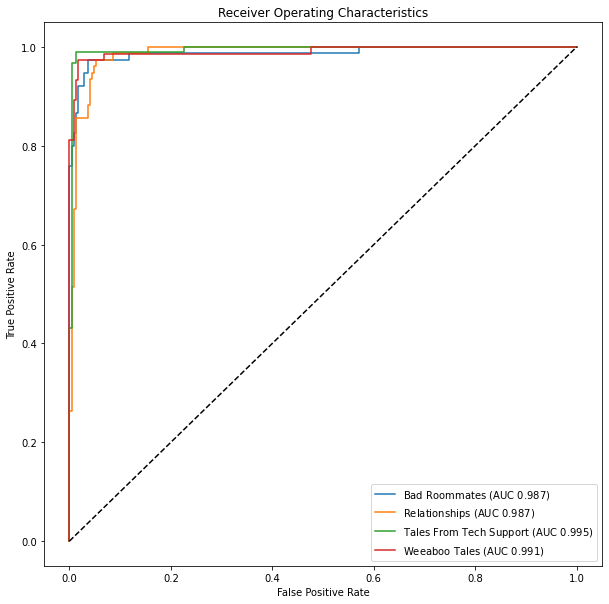

****************************************************
The ROC of  K neighbors


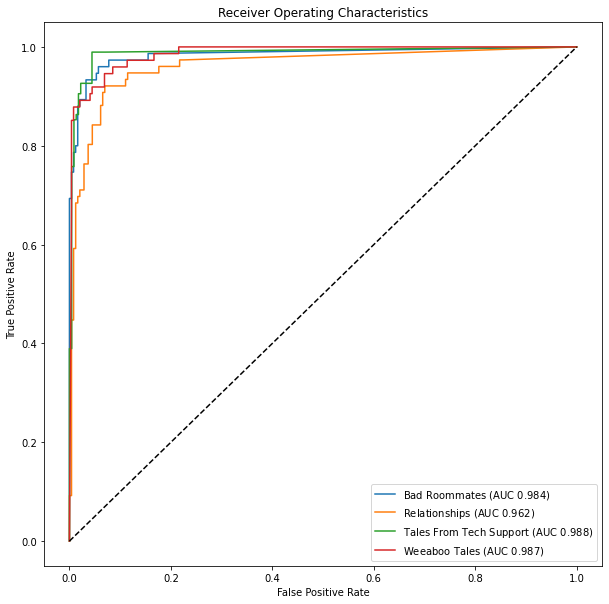

****************************************************
The ROC of  Logistic Regression


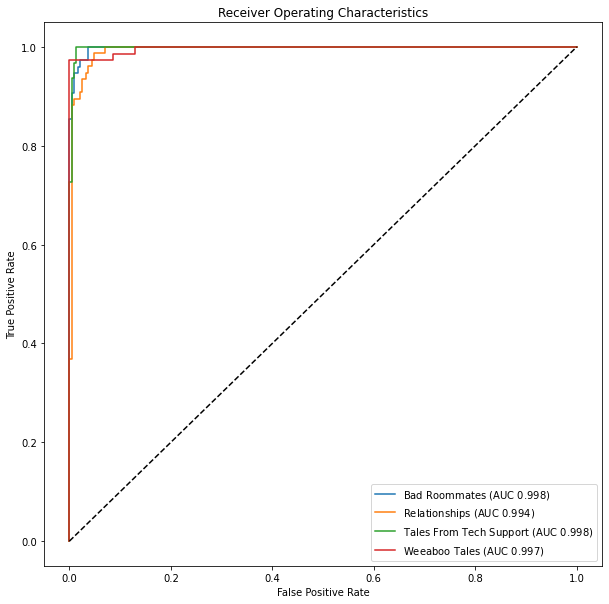

****************************************************
The ROC of  Decision tree


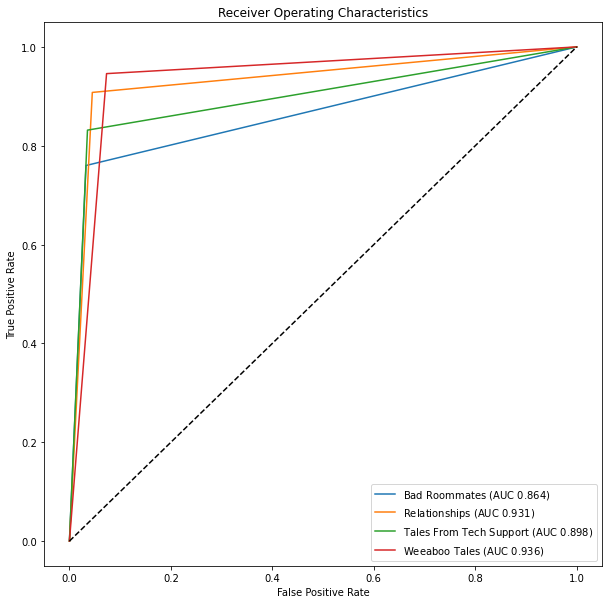

****************************************************
The ROC of  Random Forest


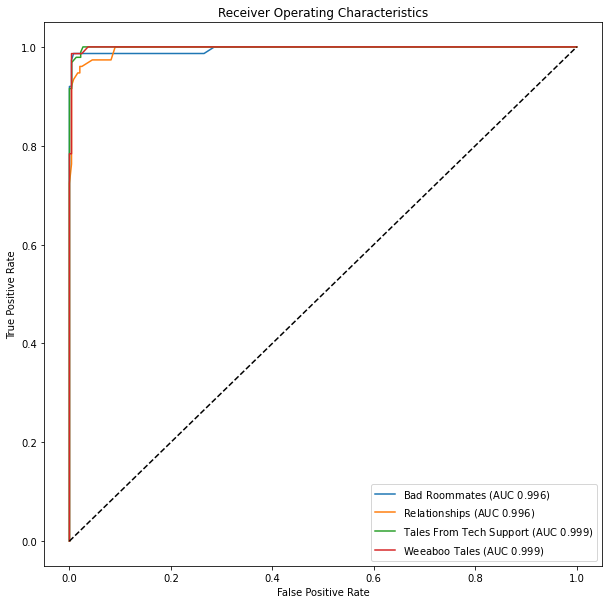

****************************************************
The ROC of  MLP


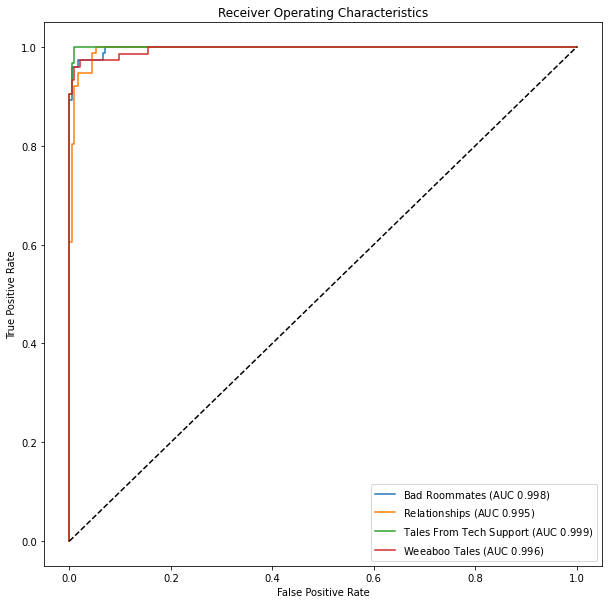

****************************************************
The ROC of  Gradient Boosting


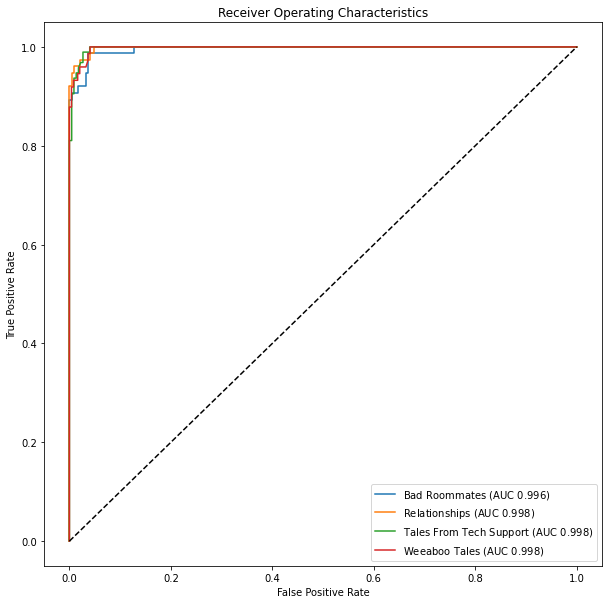

****************************************************
------------------ Dataset of  News Group -------------------
The ROC of  Bayes


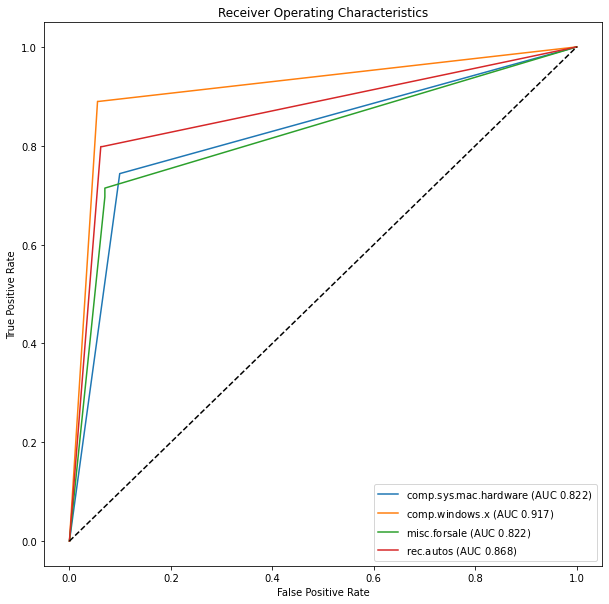

****************************************************
The ROC of  linear SVM


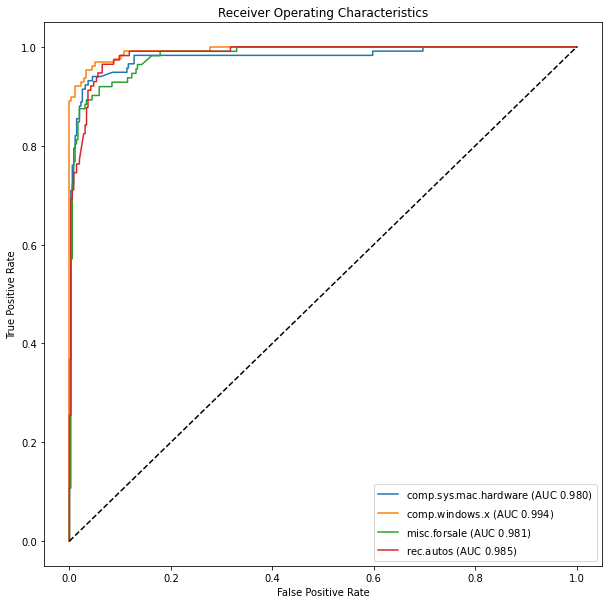

****************************************************
The ROC of  poly SVM


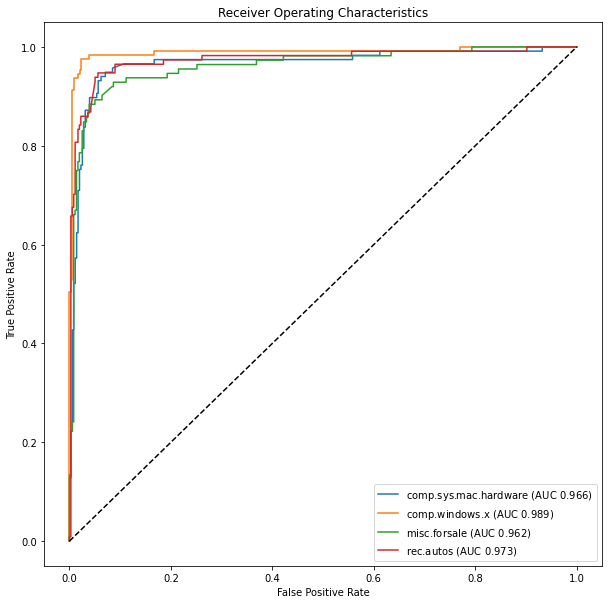

****************************************************
The ROC of  K neighbors


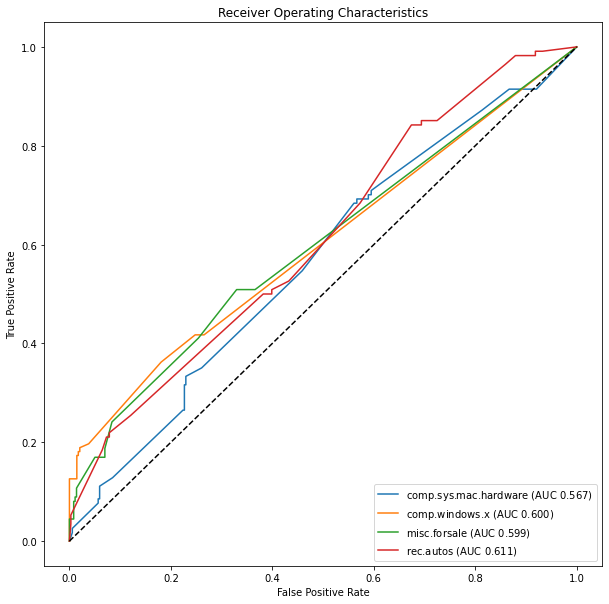

****************************************************
The ROC of  Logistic Regression


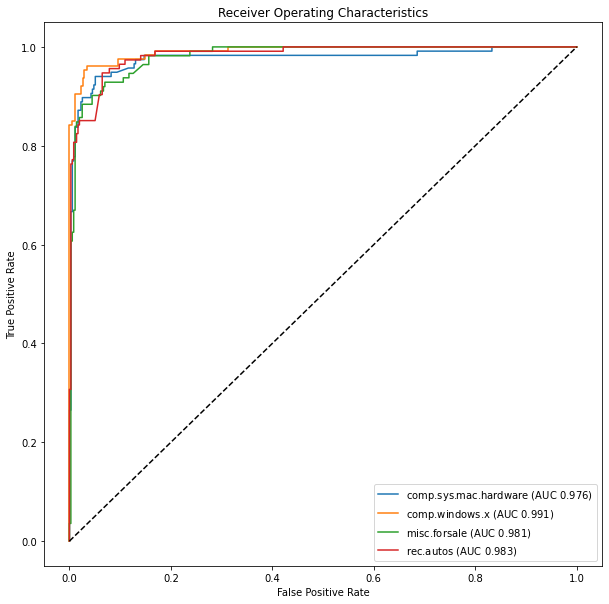

****************************************************
The ROC of  Decision tree


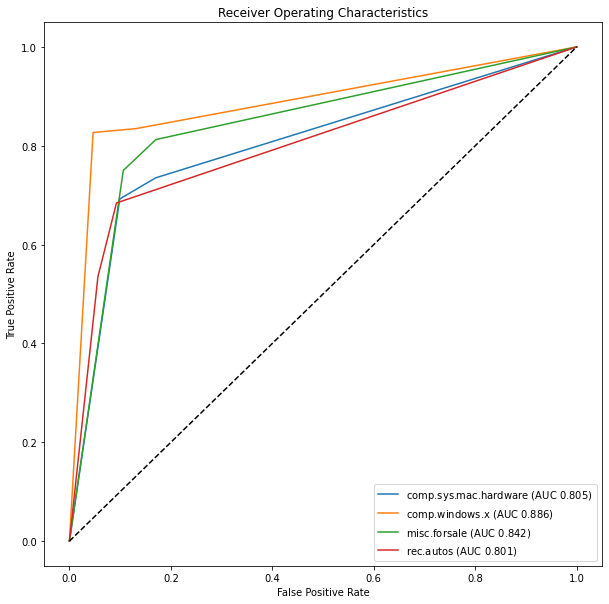

****************************************************
The ROC of  Random Forest


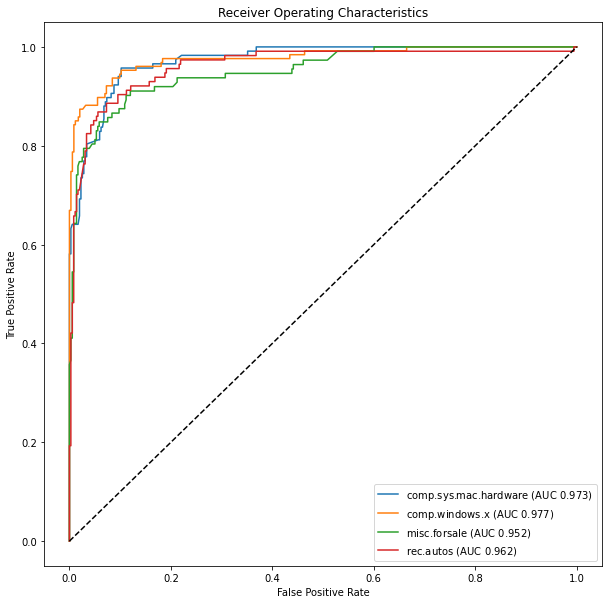

****************************************************
The ROC of  MLP


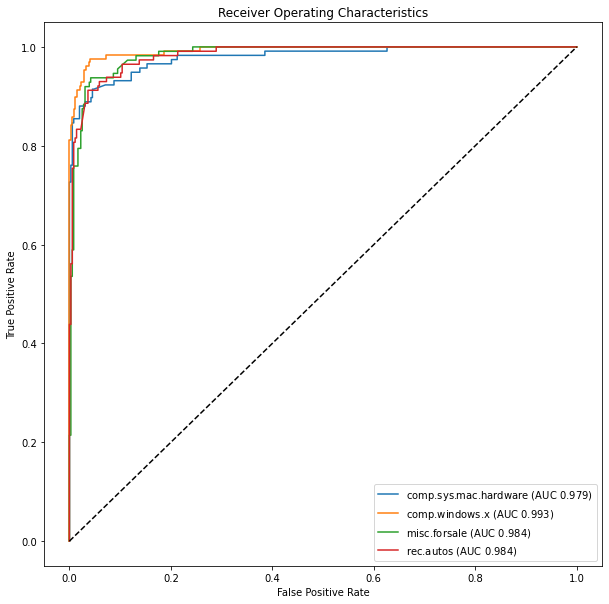

****************************************************
The ROC of  Gradient Boosting


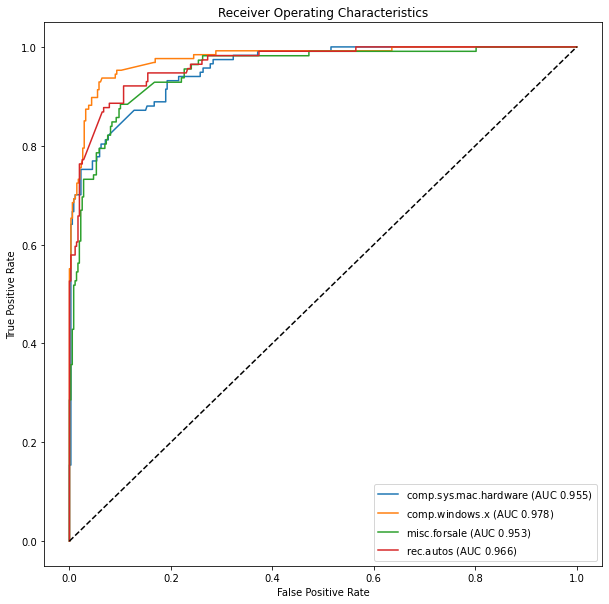

****************************************************
------------------ Dataset of  Senate -------------------
The ROC of  Bayes


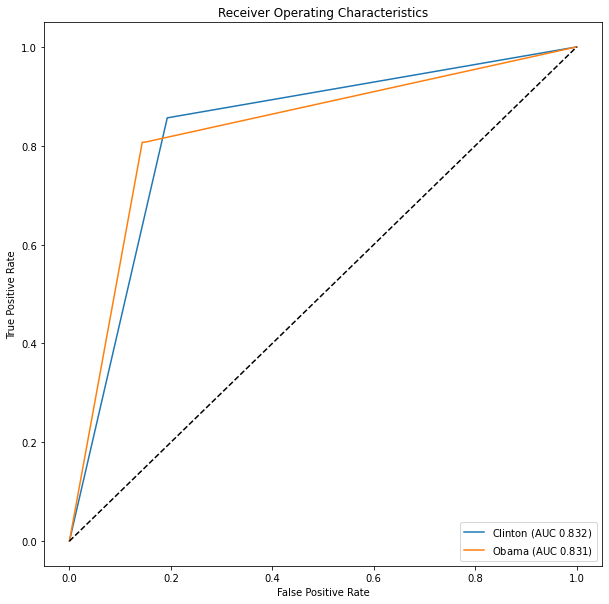

****************************************************
The ROC of  linear SVM


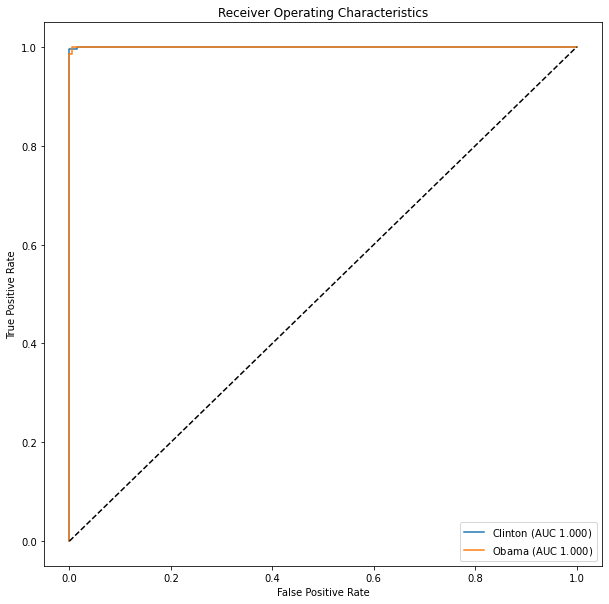

****************************************************
The ROC of  poly SVM


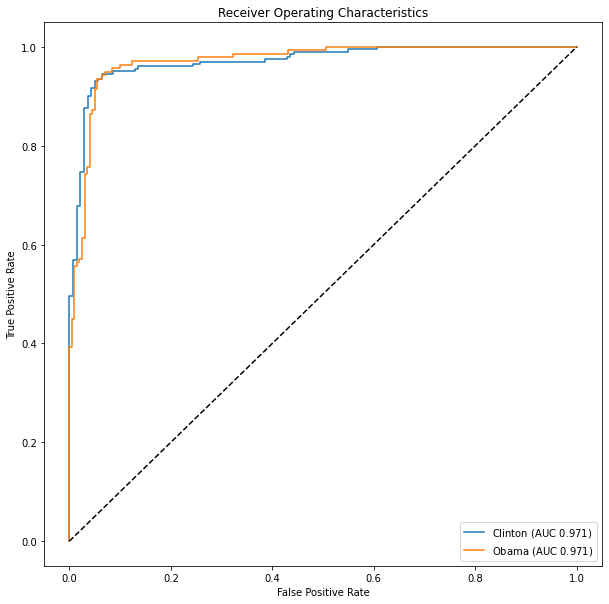

****************************************************
The ROC of  K neighbors


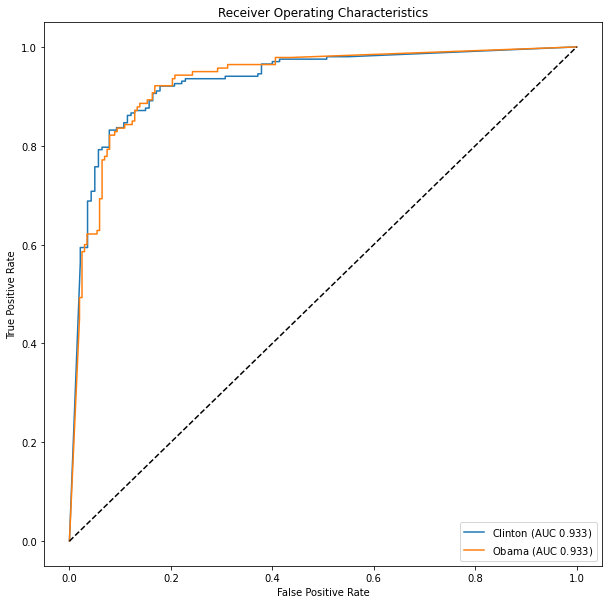

****************************************************
The ROC of  Logistic Regression


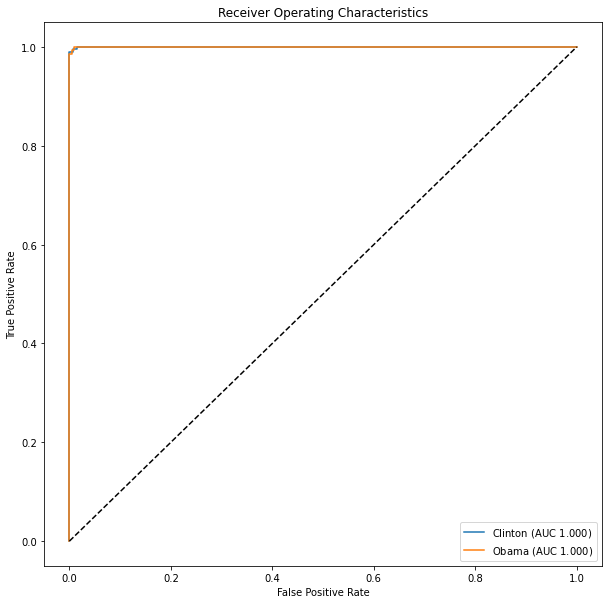

****************************************************
The ROC of  Decision tree


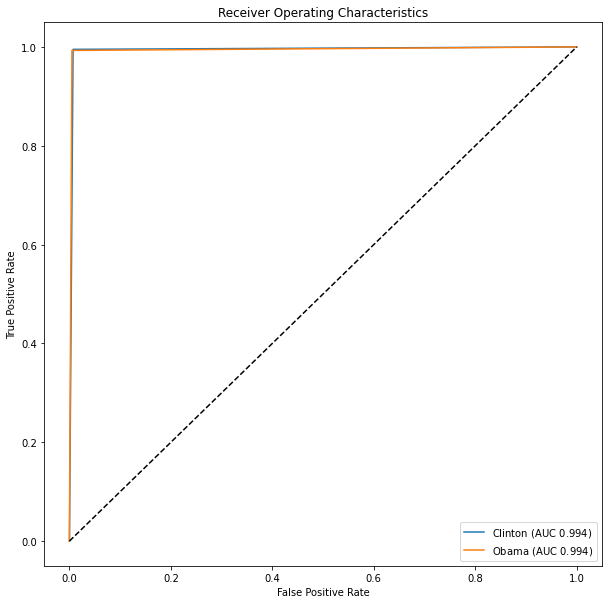

****************************************************
The ROC of  Random Forest


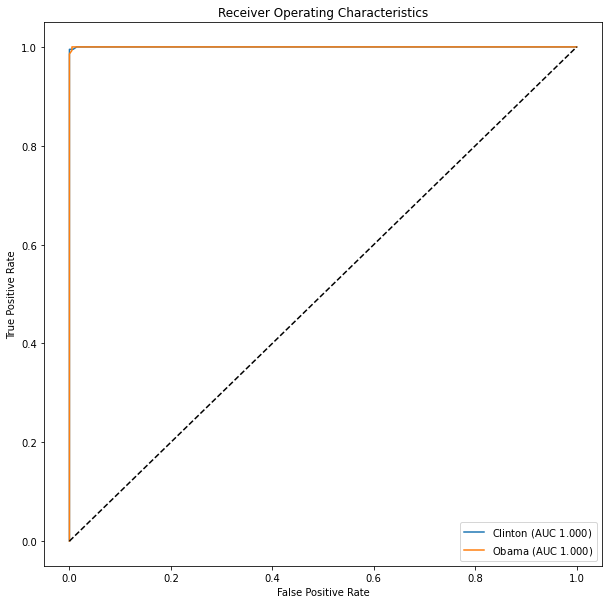

****************************************************
The ROC of  MLP


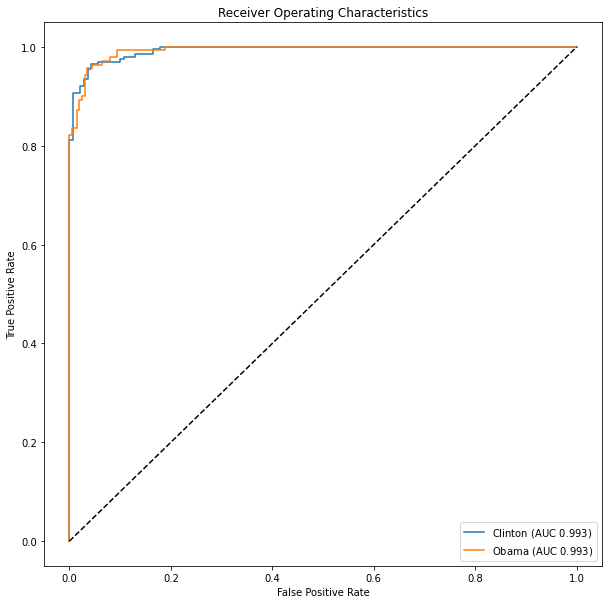

****************************************************
The ROC of  Gradient Boosting


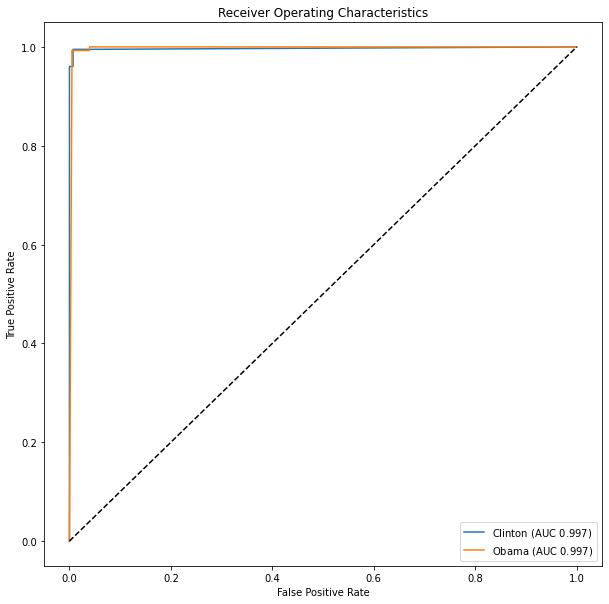

****************************************************
------------------ Dataset of  Spam -------------------
The ROC of  Bayes


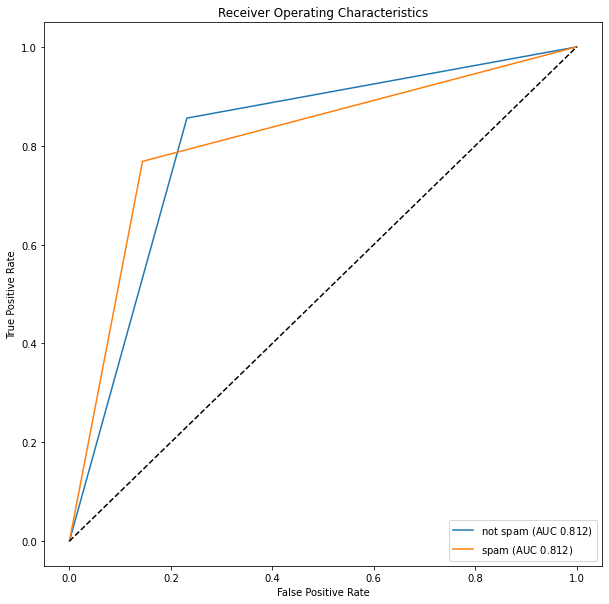

****************************************************
The ROC of  linear SVM


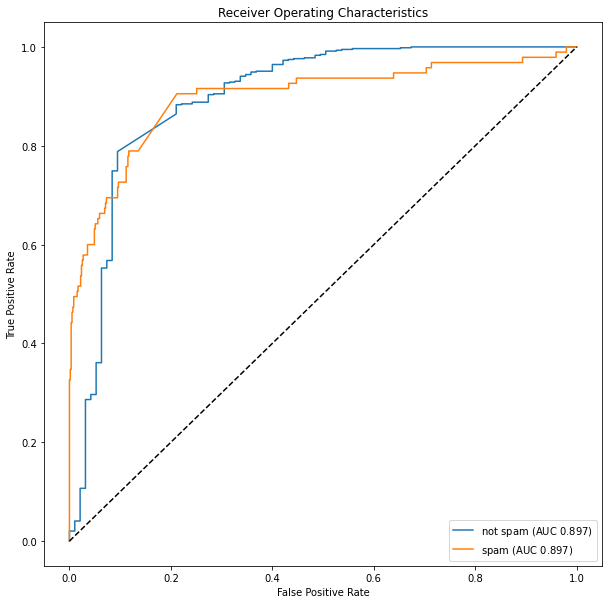

****************************************************
The ROC of  poly SVM


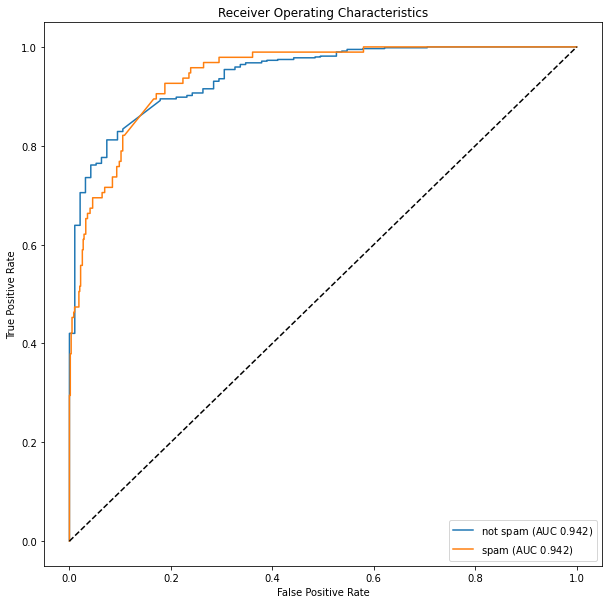

****************************************************
The ROC of  K neighbors


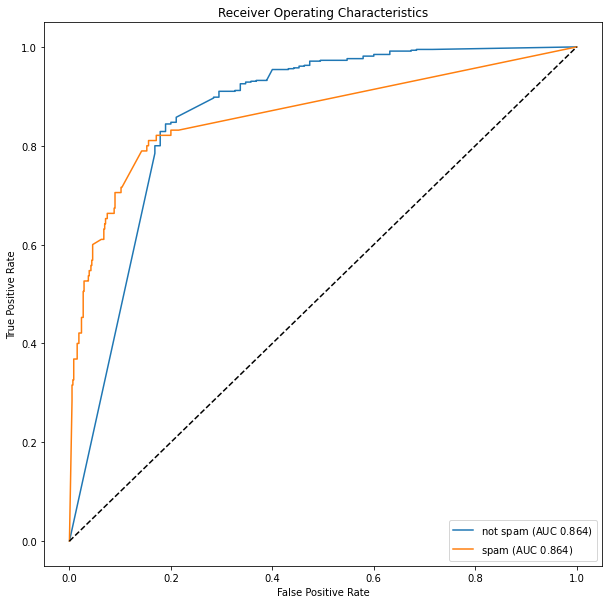

****************************************************
The ROC of  Logistic Regression


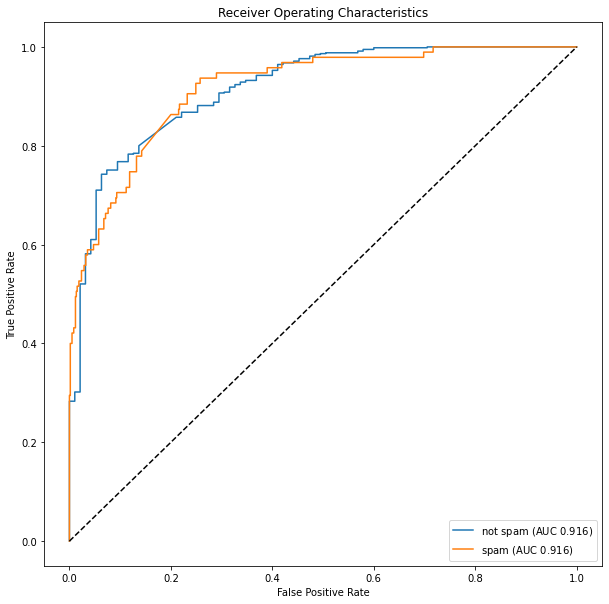

****************************************************
The ROC of  Decision tree


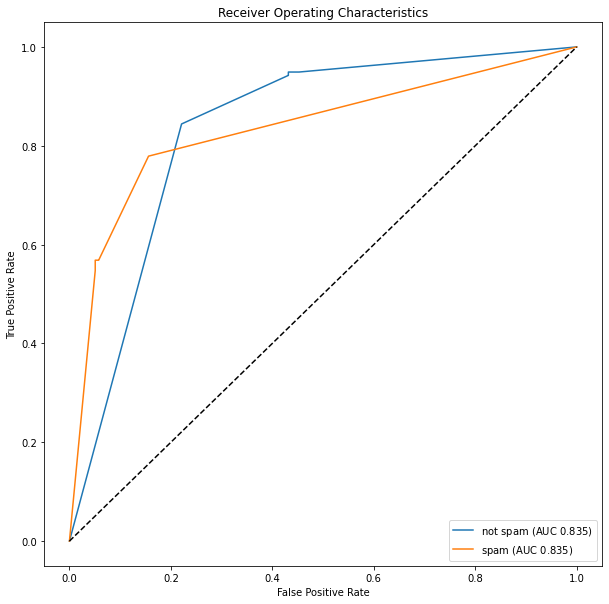

****************************************************
The ROC of  Random Forest


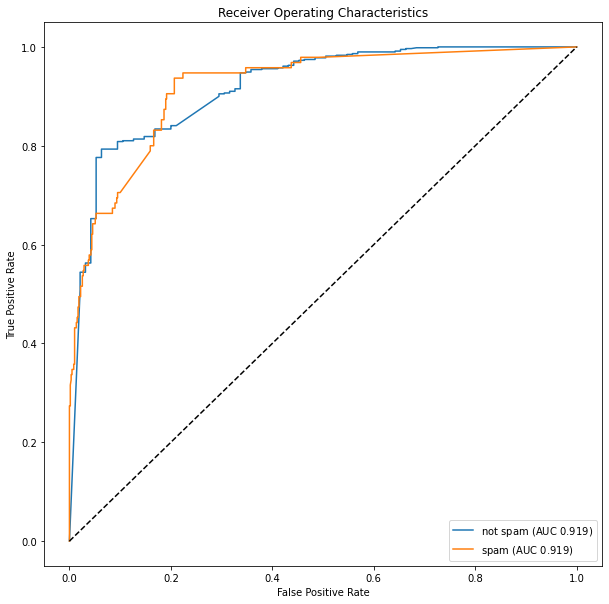

****************************************************
The ROC of  MLP


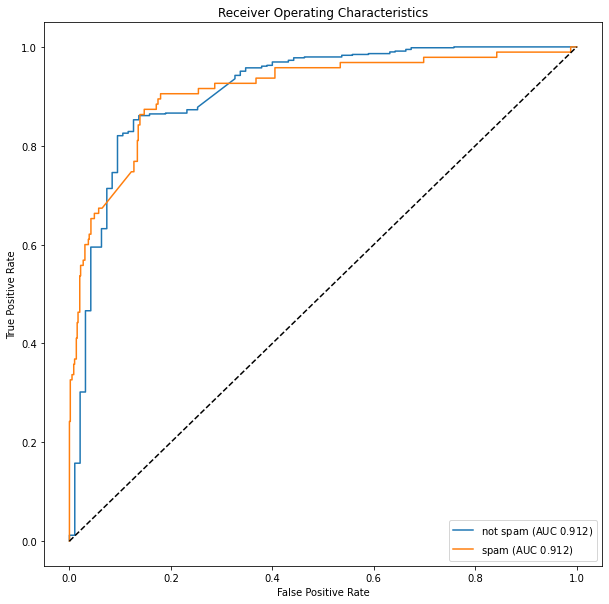

****************************************************
The ROC of  Gradient Boosting


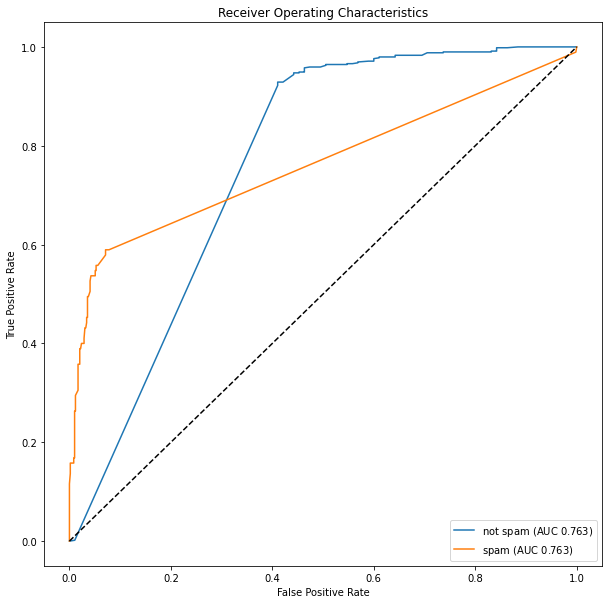

****************************************************


In [29]:
for i, data in enumerate(lst_data):
  print('------------------ Dataset of ', name_data[i+1],'-------------------')
  dfTrain, dfTest = data[0], data[1]  
  for model in lst_model:
    clf = model
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print('The ROC of ', name_dir[model])
    lucem_illud.plotMultiROC(clf, dfTest)
    print('****************************************************')

------------------ Dataset of  Reddit -------------------
The plot of  Bayes


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

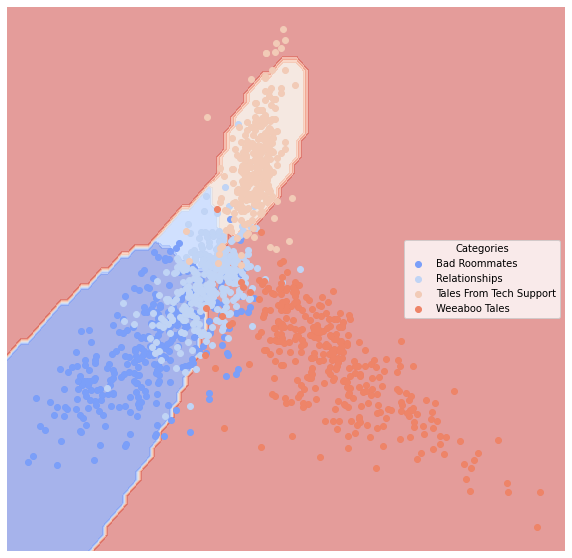

The plot of  linear SVM


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

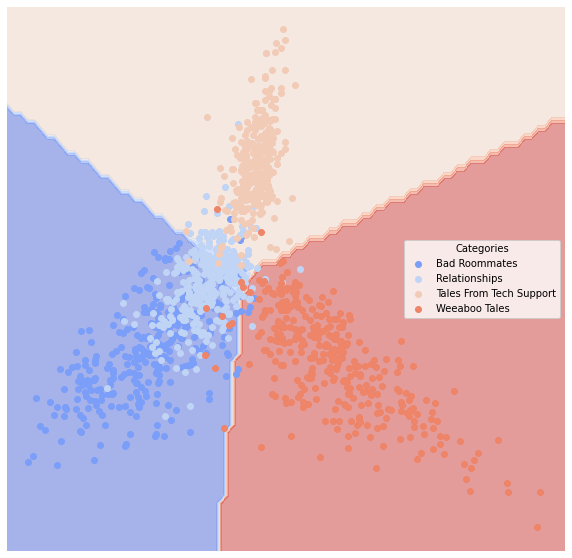

The plot of  poly SVM


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

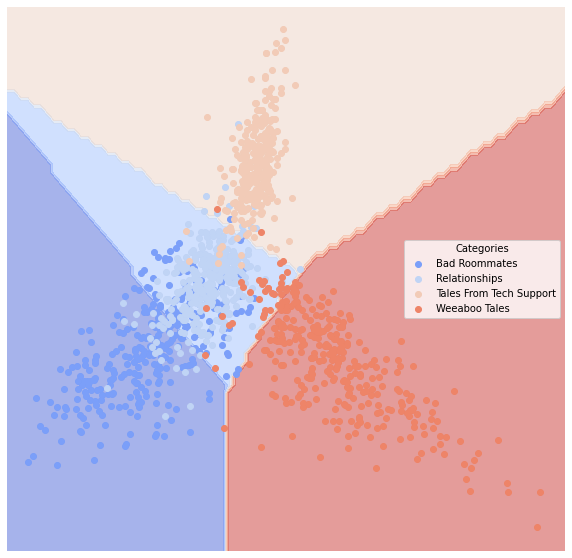

The plot of  K neighbors


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

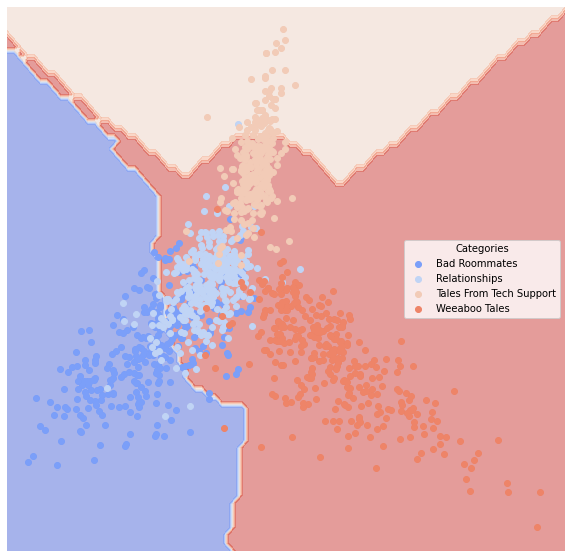

The plot of  Logistic Regression


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

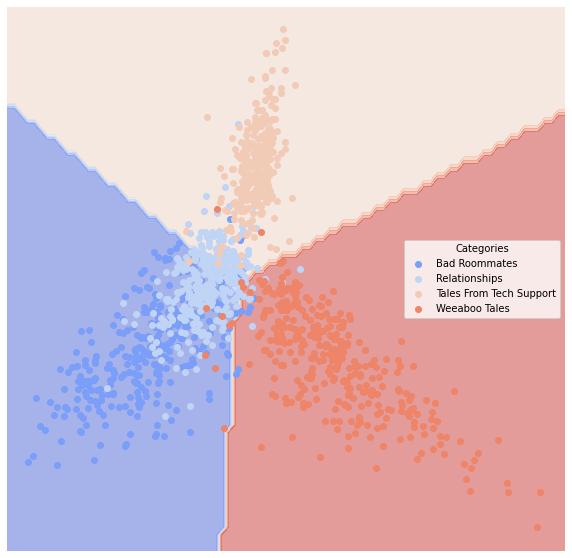

The plot of  Decision tree


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

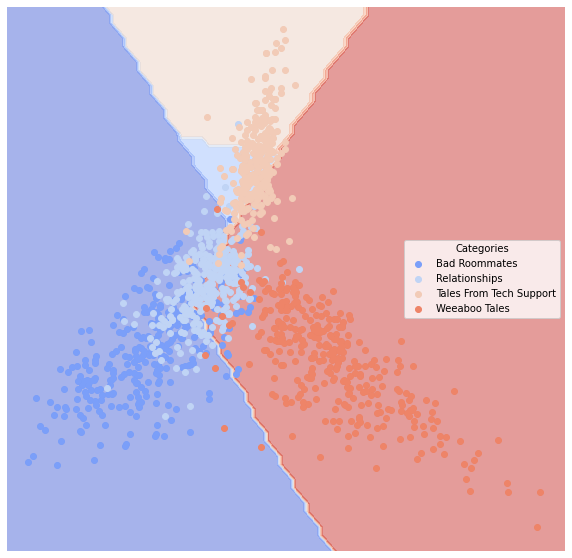

The plot of  Random Forest


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

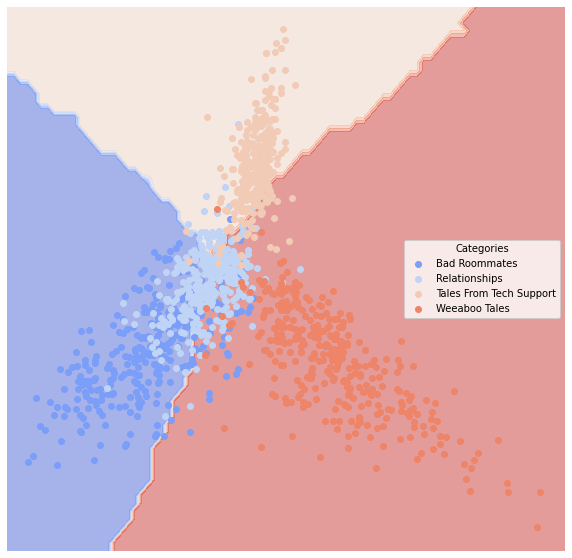

The plot of  MLP


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

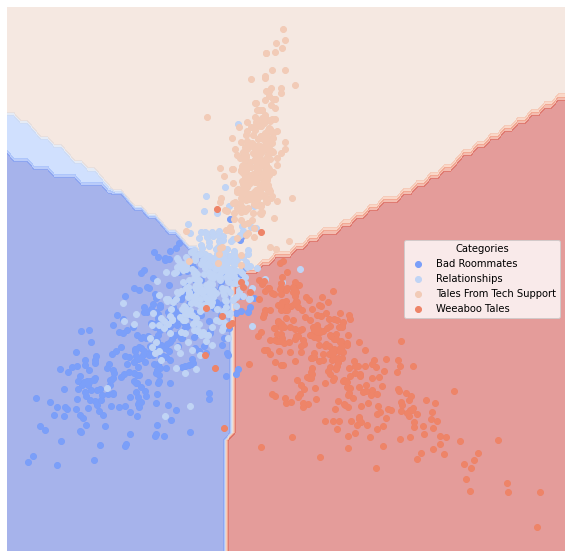

The plot of  Gradient Boosting


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

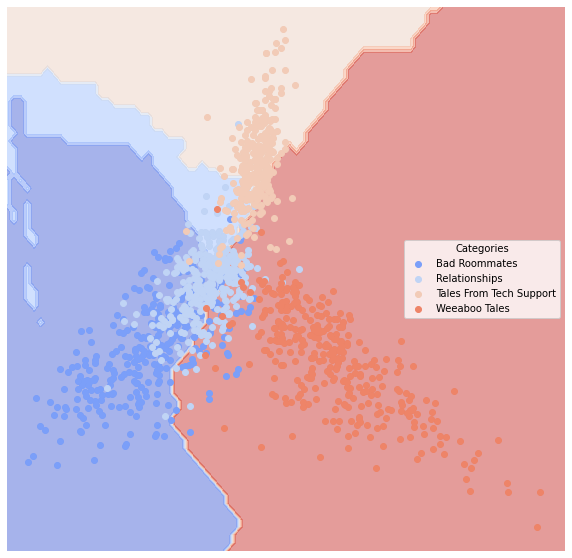

------------------ Dataset of  News Group -------------------
The plot of  Bayes


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

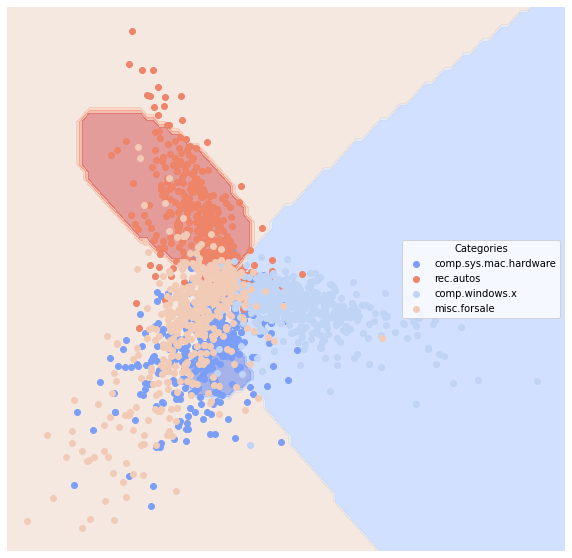

The plot of  linear SVM


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

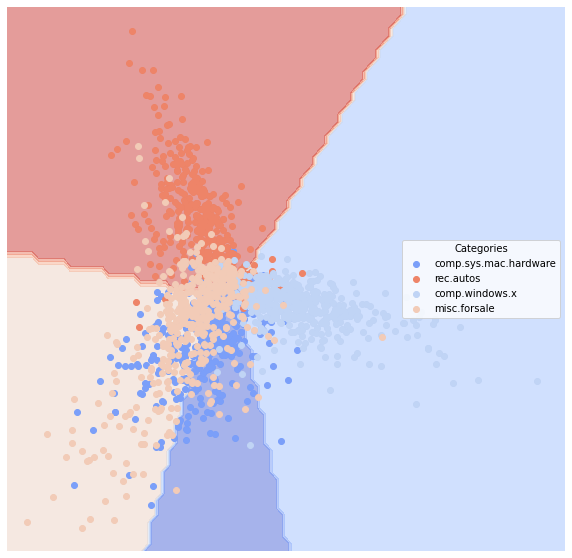

The plot of  poly SVM


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

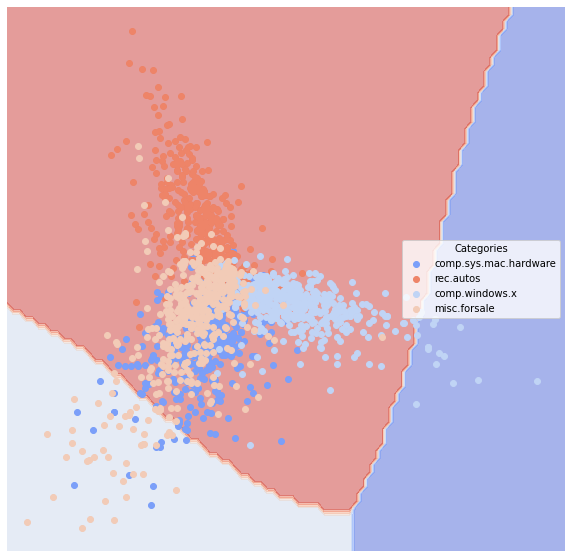

The plot of  K neighbors


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

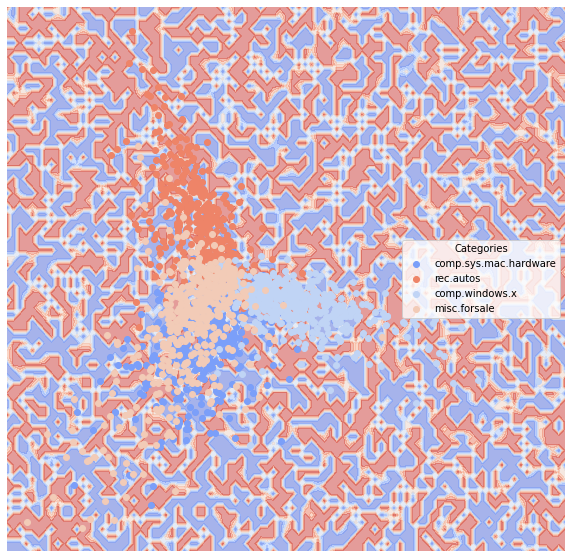

The plot of  Logistic Regression


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

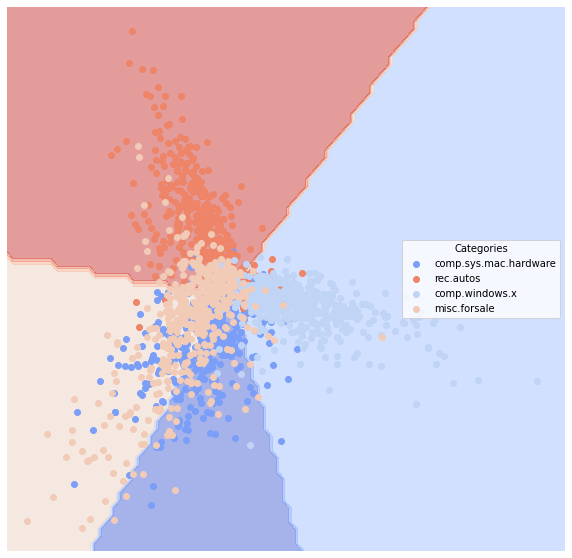

The plot of  Decision tree


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

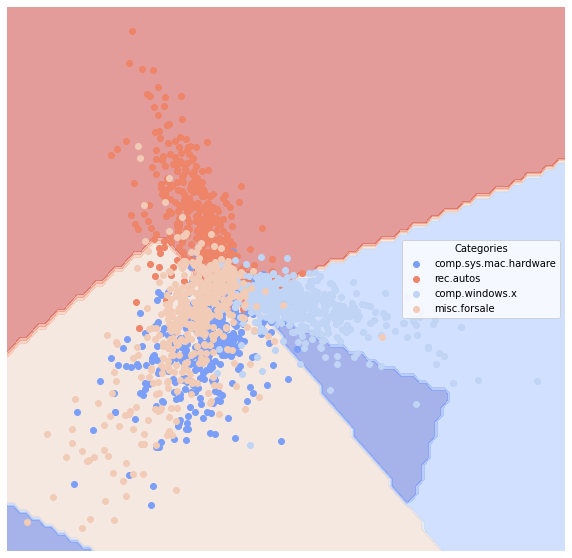

The plot of  Random Forest


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

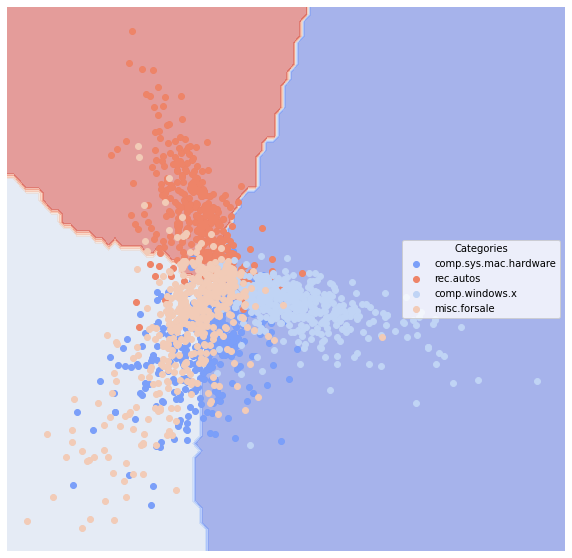

The plot of  MLP


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

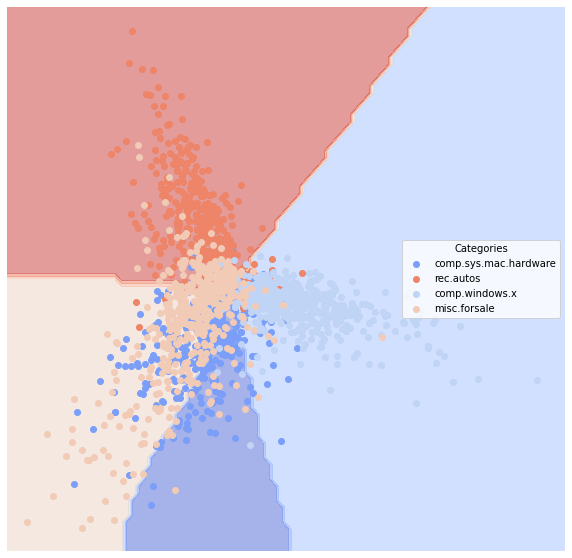

The plot of  Gradient Boosting


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

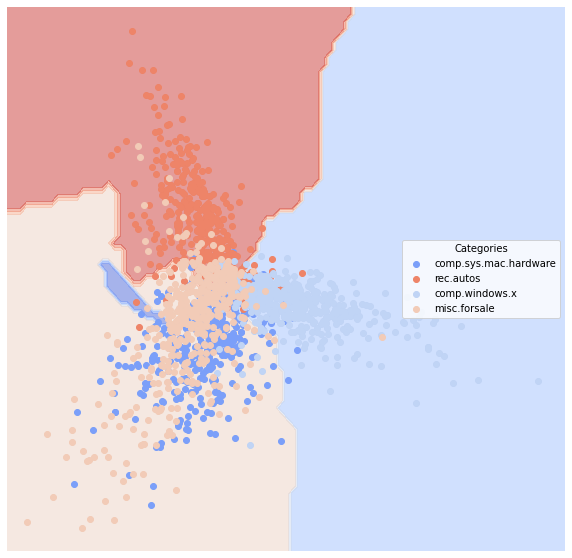

------------------ Dataset of  Senate -------------------
The plot of  Bayes


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


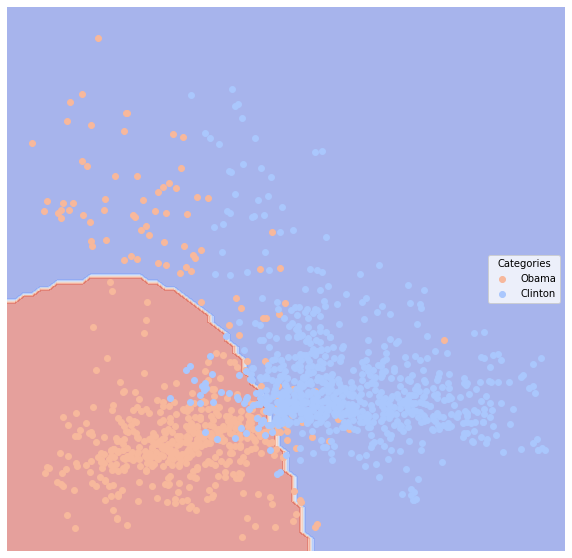

The plot of  linear SVM


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


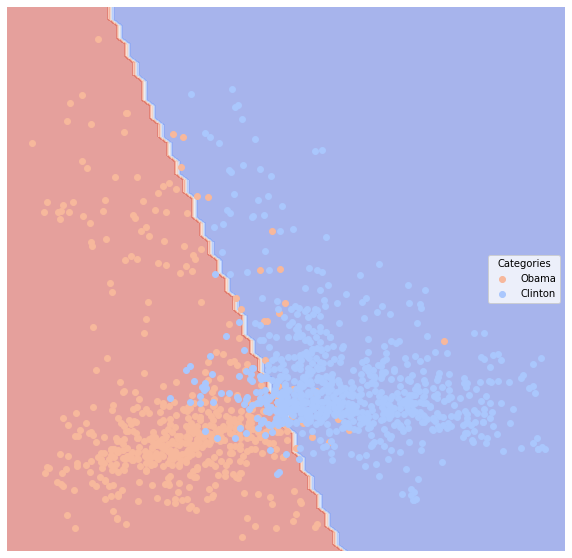

The plot of  poly SVM


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


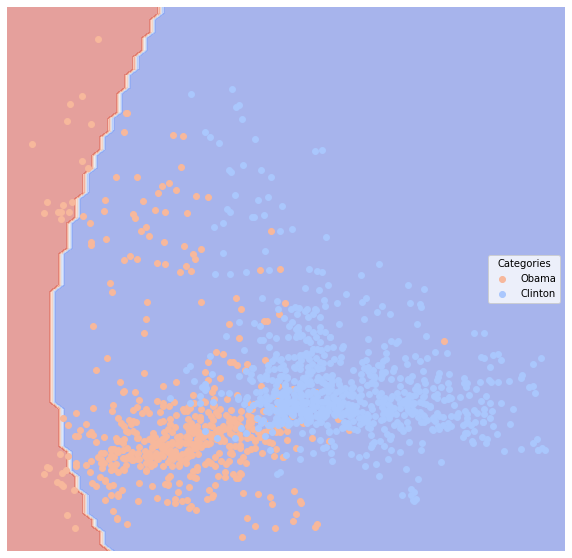

The plot of  K neighbors


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


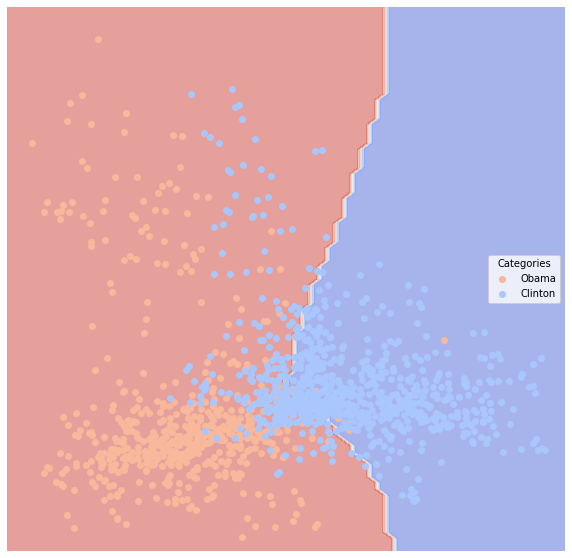

The plot of  Logistic Regression


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


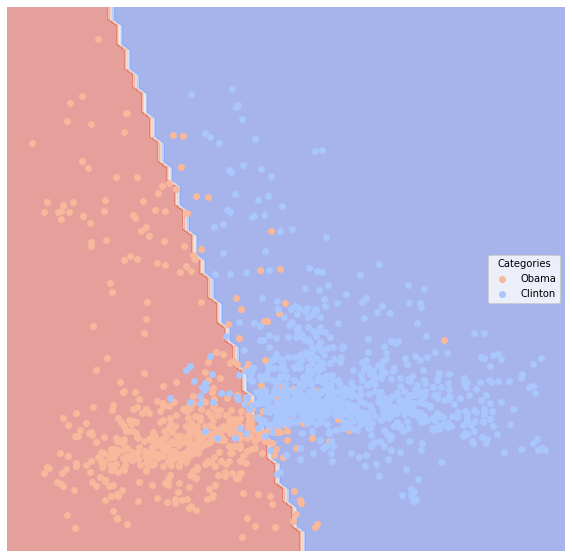

The plot of  Decision tree


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


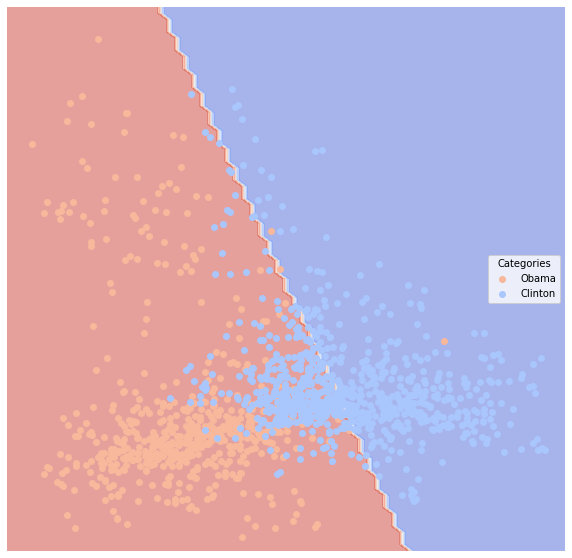

The plot of  Random Forest


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


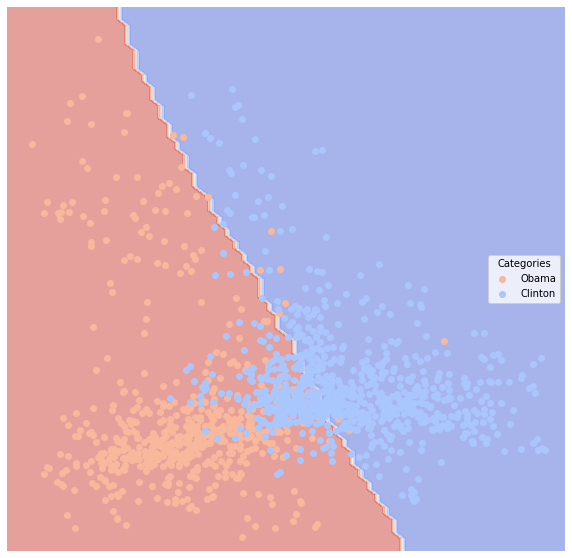

The plot of  MLP


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


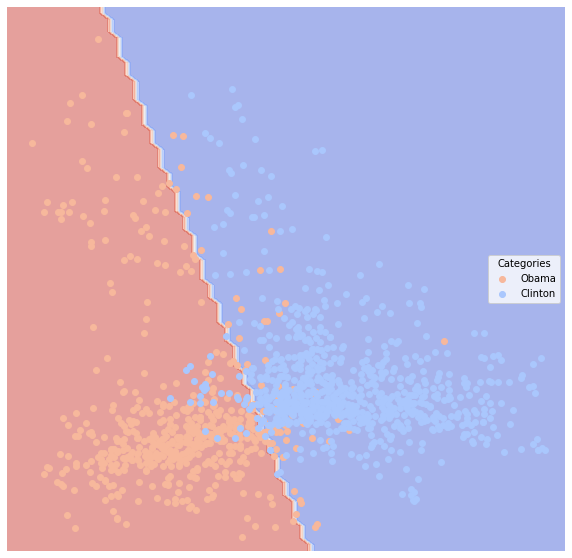

The plot of  Gradient Boosting


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


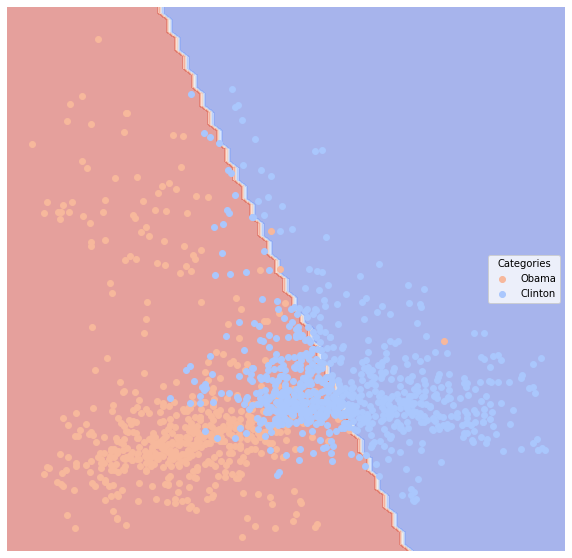

------------------ Dataset of  Spam -------------------
The plot of  Bayes


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


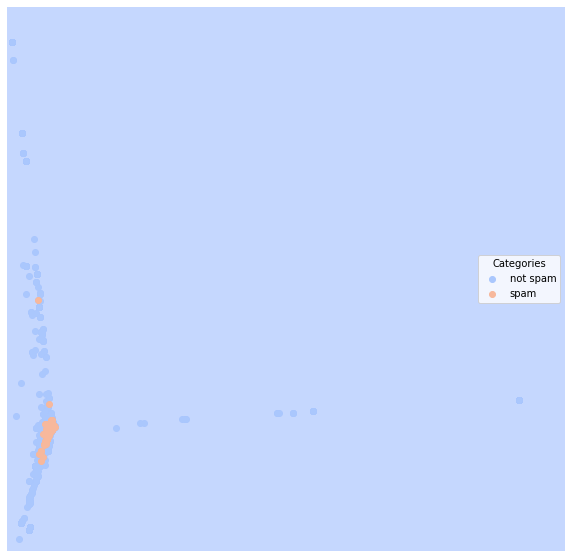

The plot of  linear SVM


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


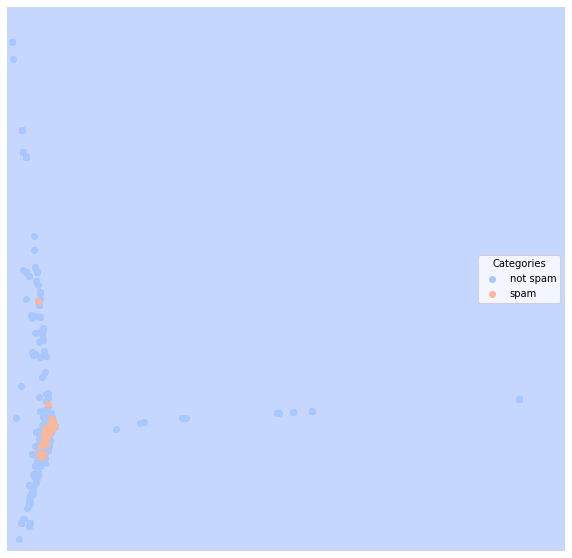

The plot of  poly SVM


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


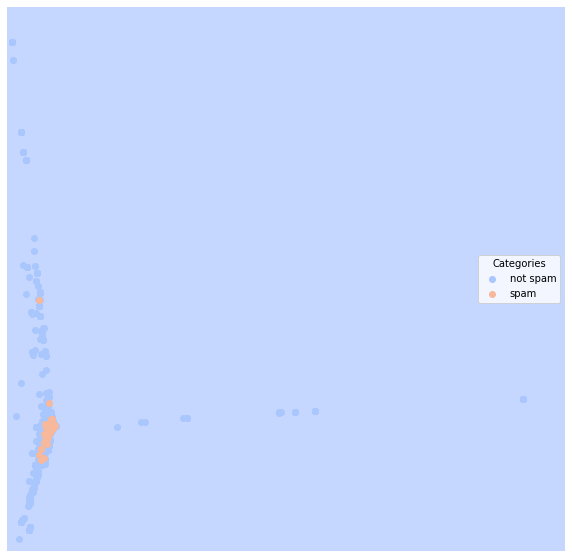

The plot of  K neighbors


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


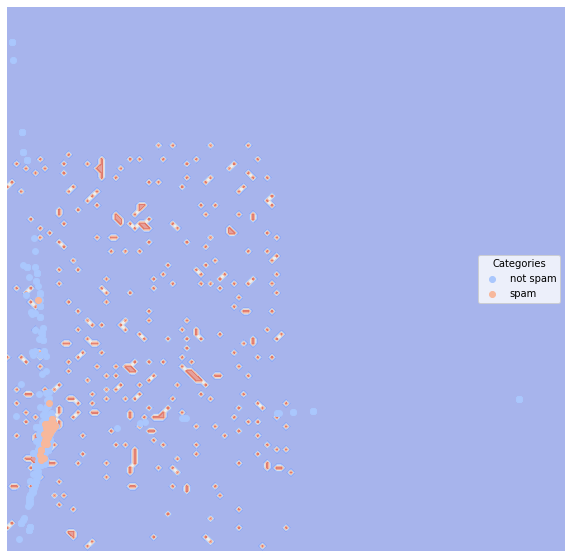

The plot of  Logistic Regression


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


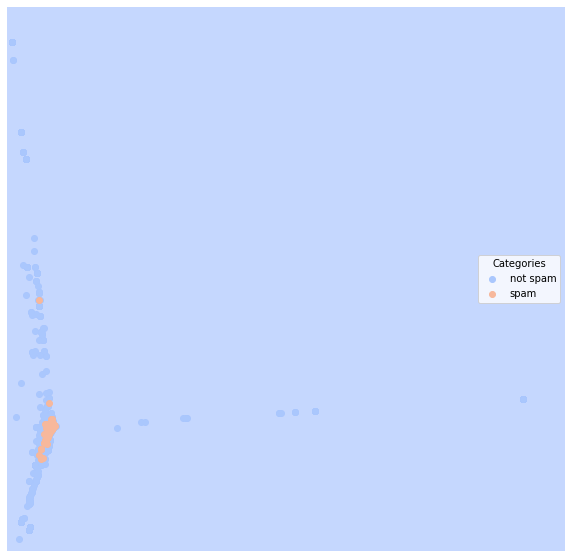

The plot of  Decision tree


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


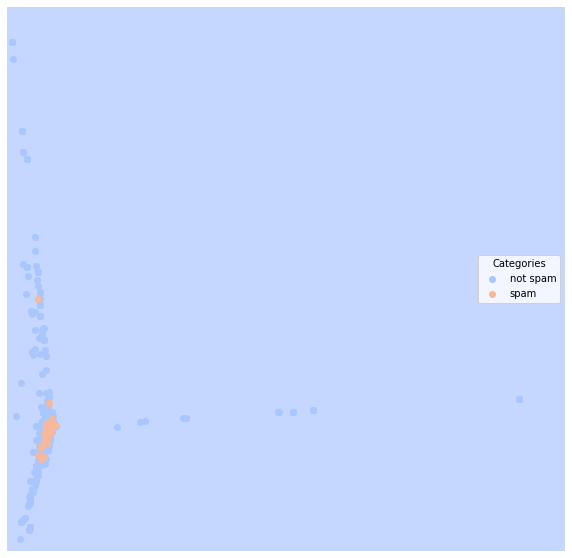

The plot of  Random Forest


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


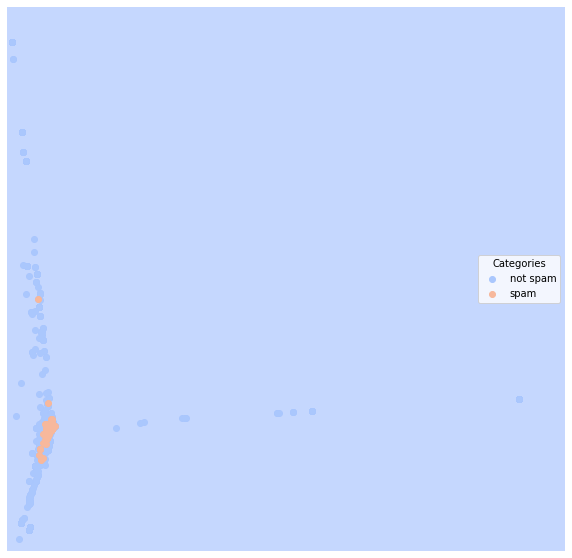

The plot of  MLP


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


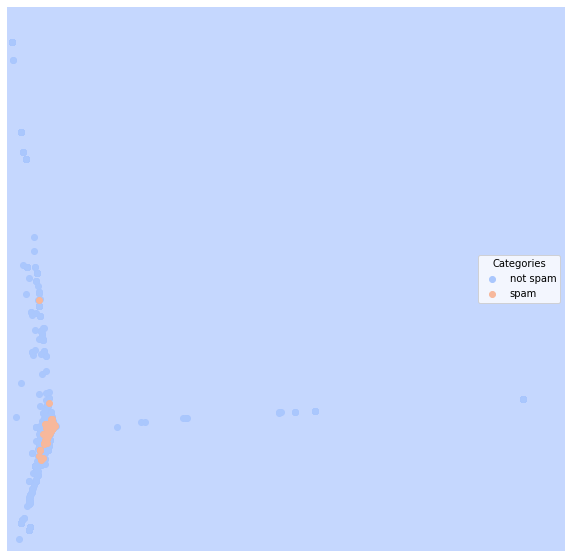

The plot of  Gradient Boosting


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


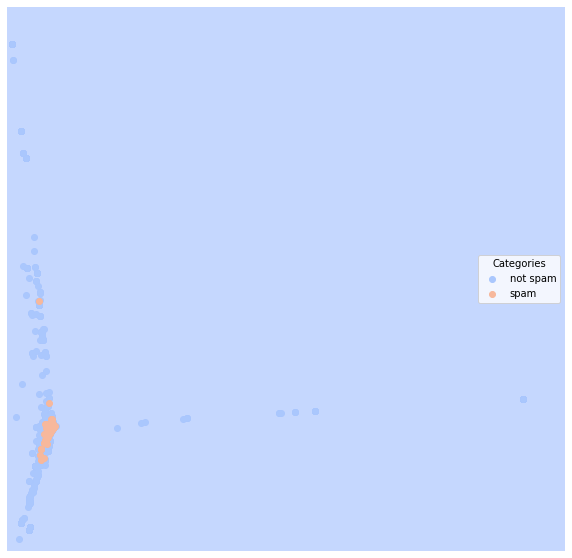

In [180]:
for i, data in enumerate(lst_data):
  print('------------------ Dataset of ', name_data[i+1],'-------------------')
  dfTrain, dfTest = data[0], data[1]    
  for model in lst_model:
    clf = model
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print('The plot of ', name_dir[model])
    lucem_illud.plotregions(clf, dfTrain)

On dataset of Reddit, linear SVM works the best. This is because the datset has multiple dimensions and SVM is good at treating with datasets with multiple dimentions. 

On dataset of News Group, MLP works the best. I assume that the dataset has complicated structure and other models do not sufficiently categorize the sample except MLP.

On the dataset of large senate, decision tree, random forest, and gradient boosting work the best. I think these models + logistic regession work really well on the dataset with two categories. 

On the dataset of SPAM, Logistic Regression works the best. I think this is because logistic regression is good at categorizing datasets that is linearly separable and weighting coefficients as indicators of feature importance. 

## <font color="red">*Exercise 3*</font>

<font color="red">In the cells immediately following, perform logistic regression classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk in Exercise 1). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In [31]:
import pandas as pd
import os
subtitle = "/content/drive/My Drive/subtitle/" 

# read file line by line
def load_corpus(url):
  raw_data = []
  index = []
  for fi in os.listdir(subtitle):
    index.append(fi)
    txt = []
    file = open(os.path.join(url, fi), "r",encoding="utf-8", errors='ignore')
    lines = file.readlines()
    file.close()
    for line in lines[24:]:
      if not line.startswith('00') and line!='\n':
        word=line
        if '\n' in word:
          word = word.replace('\n', '')
        if '<i>' in word:
          word = word.replace('<i>','')
        if '</i>' in word:
          word = word.replace('</i>', '')
        if '{\\an8}' in word:
          word = word.replace('{\\an8}', '')
        if not word.isdecimal():
          if word.startswith('-'):
            txt.append(word[1:])
          else:
            txt.append(word)
    raw_data.append(' '.join(txt))
  return raw_data, index

raw_hw, index_hw = load_corpus(subtitle)
raw_hw.pop(-1)
index_hw.pop(-1)
for i, title in enumerate(index_hw):
  index_hw[i]='hw_'+title

subtitle_kr = '/content/drive/My Drive/subtitle_kr/'
raw_kr, index_kr = load_corpus(subtitle_kr)
raw_kr.pop(-1)
index_kr.pop(-1)
for i, title in enumerate(index_kr):
  index_kr[i]='kr_'+title

index_hw.extend(index_kr)
raw_hw.extend(raw_kr)

season = []
for i in index_hw:
  if i.startswith('hw'):
    season.append('Aloha State')
  else:
    season.append('Karuizawa')

df = pd.DataFrame({'raw_data':raw_hw, 'season' : season}, index = index_hw)

df['tokenized_words'] = df['raw_data'].apply(lambda x: lucem_illud.word_tokenize(x))
df['normalized_words'] = df['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma = False))

In [33]:
df['category'] = [s=='Aloha State' for s in df['season']]

In [47]:
df

raw_data       season  \
hw_episode1   Tonight, we start a new season in Hawaii. Terr...  Aloha State   
hw_episode2   Terrace House: Aloha State has begun. Yes! The...  Aloha State   
hw_episode3   I'm certain you've noticed that Torichan is no...  Aloha State   
hw_episode4   Torichan is at a very important job once again...  Aloha State   
hw_episode5   Last time, there was the surfing issue... Laur...  Aloha State   
...                                                         ...          ...   
kr_episode32  Let's see. A lot happened last week. Let's sta...    Karuizawa   
kr_episode33  Let's see. Last week... things started out lig...    Karuizawa   
kr_episode34  Let's see. Last week, Shunsuke moved in. He an...    Karuizawa   
kr_episode35  Let's see. Three members left last week. Yes, ...    Karuizawa   
kr_episode36  Let's see... Last week, three new members move...    Karuizawa   

                                                tokenized_words  \
hw_episode1   [Tonight, we, start, a, new, season, in, Hawai...   
hw_episode2   [Terrace, House, Aloha, State, has, begun, Yes...   
hw_episode3   [I, 'm, certain, you, 've, noticed, that, Tori...   
hw_episode4   [Torichan, is, at, a, very, important, job, on...   
hw_episode5   [Last, time, there, was, the, surfing, issue, ...   
...                                                         ...   
kr_episode32  [Let, 's, see, A, lot, happened, last, week, L...   
kr_episode33  [Let, 's, see, Last, week, things, started, ou...   
kr_episode34  [Let, 's, see, Last, week, Shunsuke, moved, in...   
kr_episode35  [Let, 's, see, Three, members, left, last, wee...   
kr_episode36  [Let, 's, see, Last, week, three, new, members...   

                                               normalized_words  category  
hw_episode1   [tonight, start, new, season, hawaii, terrace,...      True  
hw_episode2   [terrace, house, aloha, state, begun, yes, hou...      True  
hw_episode3   [m, certain, ve, noticed, torichan, today, pri...      True  
hw_episode4   [torichan, important, job, week, today, day, y...      True  
hw_episode5   [time, surfing, issue, lauren, avian, talk, er...      True  
...                                                         ...       ...  
kr_episode32  [let, lot, happened, week, let, start, positiv...     False  
kr_episode33  [let, week, things, started, lighthearted, tak...     False  
kr_episode34  [let, week, shunsuke, moved, noah, bath, noah,...     False  
kr_episode35  [let, members, left, week, yes, seina, noah, l...     False  
kr_episode36  [let, week, new, members, moved, right, let, r...     False  

[72 rows x 5 columns]

In [34]:
holdBackFraction = .2
train_data_df, test_data_df = sklearn.model_selection.train_test_split(df, test_size=holdBackFraction)

In [53]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=50, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['raw_data'])

In [49]:
print(len(train_data_df))
print(len(test_data_df))

57
15


In [54]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [55]:
TFVects.shape

(57, 3674)

In [56]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

In [57]:
train_data_df['pca'] = [r for r in reduced_data]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


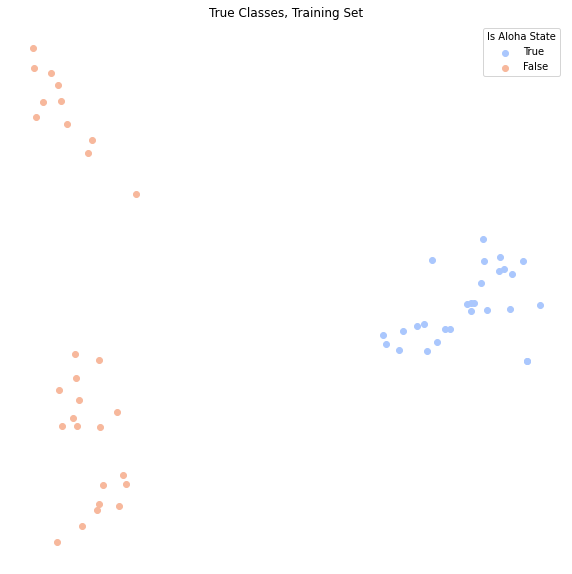

In [58]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Aloha State')
plt.title('True Classes, Training Set')
plt.show()

In [40]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

In [60]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression()

In [61]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

1.0

In [62]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['raw_data'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

1.0

In [44]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
1.0
Testing:
1.0


In [45]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

1.0


In [46]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

1.0


**On my dataset, both PCA and logistic regression could accurately predict the season with accuracy of 100%. I think that there exists a lot of unique words in texts of each season, such as names and locations.
In order to remove such influence, we would need to remove such words and see how conversation between each cast.**

## <font color="red">*Exercise 4*</font>

<font color="red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

In [70]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])

DecisionTreeClassifier(max_depth=4, random_state=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


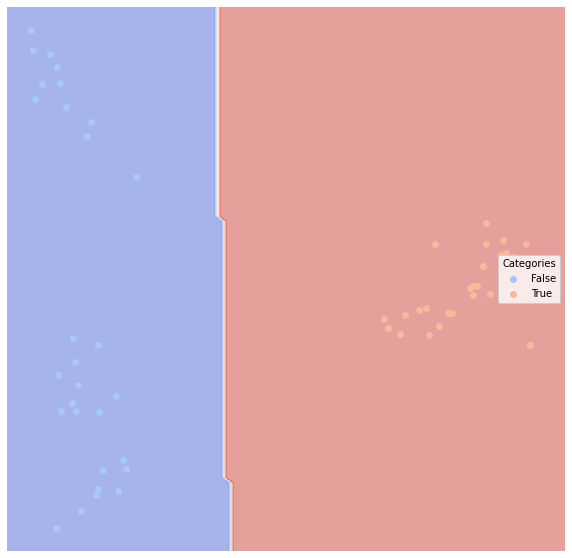

In [71]:
lucem_illud.plotregions(clf_tree, train_data_df)

In [74]:
lucem_illud.evaluateClassifier(clf_tree, test_data_df)

Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
False            0.0  1.0        1.0                1.0     1.0
True             0.0  1.0        1.0                1.0     1.0

In [75]:
sklearn.metrics.accuracy_score(test_data_df['category'],clf_tree.predict(np.stack(test_data_df['vect'], axis = 0)))

1.0

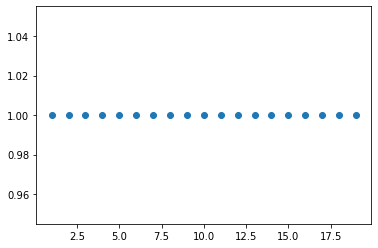

In [77]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])
    score = sklearn.metrics.accuracy_score(test_data_df['category'], tree2.predict(np.stack(test_data_df['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

In [79]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [80]:
bag.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_samples=0.8, n_estimators=100, random_state=1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


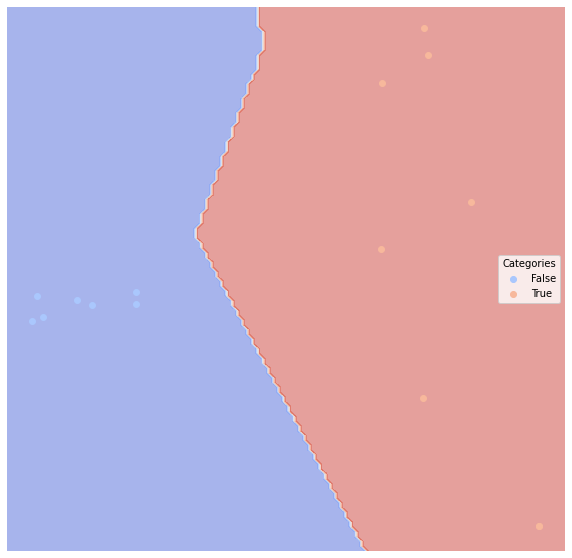

In [81]:
lucem_illud.plotregions(bag, test_data_df)

In [82]:
lucem_illud.evaluateClassifier(bag, test_data_df)

Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
False            0.0  1.0        1.0                1.0     1.0
True             0.0  1.0        1.0                1.0     1.0

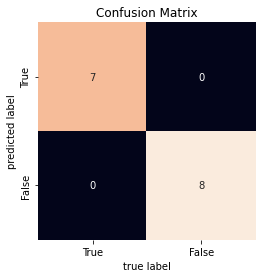

In [83]:
lucem_illud.plotConfusionMatrix(bag, test_data_df)

**Same as above, random forest and decision tree succeeded in predicting seasons with accuracy of 1.0. Similarily, there exists a lot of unique words in texts of each season, such as names and locations.
In order to remove such influence, we would need to remove such words and see how conversation between each cast.** 

## <font color="red">*Exercise 5*</font>

<font color="red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [84]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [85]:
clf_knearest.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])

KNeighborsClassifier(n_neighbors=15)

In [86]:
lucem_illud.evaluateClassifier(clf_knearest, train_data_df)

Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
False            0.0  1.0        1.0                1.0     1.0
True             0.0  1.0        1.0                1.0     1.0

In [89]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['raw_data'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_data_df['predict'] = clf_knearest.predict(np.stack(test_data_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Testing score:
1.0


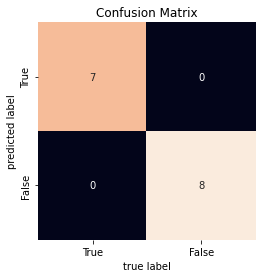

In [91]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_data_df)

**Same as above, k-nearest neighbor succeeded in predicting seasons with accuracy of 1.0. Similarily, there exists a lot of unique words in texts of each season, such as names and locations.
In order to remove such influence, we would need to remove such words and see how conversation between each cast.** 

**I think, with label, k-nearest neighbors becomes more successful in categorizing samples. This is because Aloha State season has more culturally diverse setting and its casts' conversation has more diversity. kNN captures its diversity and is more successful** 

## <font color="red">*Exercise 6*</font>

<font color="red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, logistic and decision-tree approaches?

In [100]:
df['tokenized_text'] = df['raw_data'].apply(lambda x: lucem_illud.word_tokenize(x))
df['normalized_text'] = df['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

TFVects_norm = TFVectorizer.fit_transform([' '.join(l) for l in df['normalized_text']])
df['vect'] = [np.array(v).flatten() for v in TFVects_norm.todense()]

In [101]:
holdBackFraction = .2
train_df, test_df = sklearn.model_selection.train_test_split(df, test_size=holdBackFraction)

In [108]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_df['vect'], axis=0), train_df['category'])

MLPClassifier()

In [109]:
lucem_illud.evaluateClassifier(clf_nn, test_df)

Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
False            0.0  1.0        1.0                1.0     1.0
True             0.0  1.0        1.0                1.0     1.0

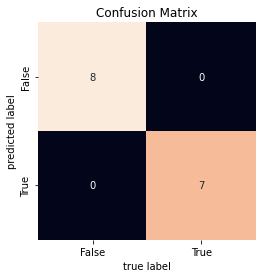

In [110]:
lucem_illud.plotConfusionMatrix(clf_nn, test_df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


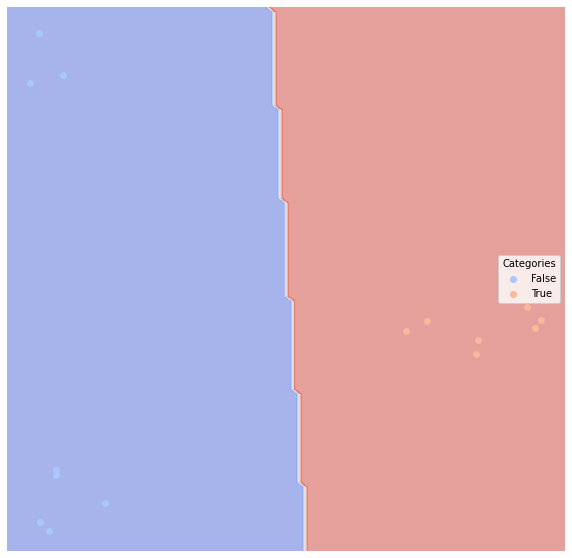

In [112]:
lucem_illud.plotregions(clf_nn, test_df)

**Same as kNN, neural network succeeded in predicting seasons with accuracy of 1.0. Similarily, there exists a lot of unique words in texts of each season, such as names and locations.
In order to remove such influence, we would need to remove such words and see how conversation between each cast. We can't see any difference in the capability of prediction across different models** 

## <font color="red">*Exercise 7*</font>

<font color="red">In the cells immediately following, use the pipeline functions or the word or sentence vector functions (e.g., similarity) to explore the social game underlying the production and meaning of texts associated with your final project. How does BERT help you gain insight regarding your research question that is similar and different from prior methods?

In [114]:
text = ''
for txt in df['raw_data']:
  text+=txt

In [115]:
pip install transformers

     |████████████████████████████████| 3.8 MB 14.3 MB/s 
     |████████████████████████████████| 596 kB 55.7 MB/s 
     |████████████████████████████████| 6.5 MB 53.8 MB/s 
     |████████████████████████████████| 895 kB 54.2 MB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [121]:
df['tokenized_sents'] = df['raw_data'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
df['normalized_sents'] = df['tokenized_sents'].apply(lambda x:[lucem_illud.normalizeTokens(s) for s in x])

In [122]:
df

raw_data       season  \
hw_episode1   Tonight, we start a new season in Hawaii. Terr...  Aloha State   
hw_episode2   Terrace House: Aloha State has begun. Yes! The...  Aloha State   
hw_episode3   I'm certain you've noticed that Torichan is no...  Aloha State   
hw_episode4   Torichan is at a very important job once again...  Aloha State   
hw_episode5   Last time, there was the surfing issue... Laur...  Aloha State   
...                                                         ...          ...   
kr_episode32  Let's see. A lot happened last week. Let's sta...    Karuizawa   
kr_episode33  Let's see. Last week... things started out lig...    Karuizawa   
kr_episode34  Let's see. Last week, Shunsuke moved in. He an...    Karuizawa   
kr_episode35  Let's see. Three members left last week. Yes, ...    Karuizawa   
kr_episode36  Let's see... Last week, three new members move...    Karuizawa   

                                                tokenized_words  \
hw_episode1   [Tonight, we, start, a, new, season, in, Hawai...   
hw_episode2   [Terrace, House, Aloha, State, has, begun, Yes...   
hw_episode3   [I, 'm, certain, you, 've, noticed, that, Tori...   
hw_episode4   [Torichan, is, at, a, very, important, job, on...   
hw_episode5   [Last, time, there, was, the, surfing, issue, ...   
...                                                         ...   
kr_episode32  [Let, 's, see, A, lot, happened, last, week, L...   
kr_episode33  [Let, 's, see, Last, week, things, started, ou...   
kr_episode34  [Let, 's, see, Last, week, Shunsuke, moved, in...   
kr_episode35  [Let, 's, see, Three, members, left, last, wee...   
kr_episode36  [Let, 's, see, Last, week, three, new, members...   

                                               normalized_words  category  \
hw_episode1   [tonight, start, new, season, hawaii, terrace,...      True   
hw_episode2   [terrace, house, aloha, state, begun, yes, hou...      True   
hw_episode3   [m, certain, ve, noticed, torichan, today, pri...      True   
hw_episode4   [torichan, important, job, week, today, day, y...      True   
hw_episode5   [time, surfing, issue, lauren, avian, talk, er...      True   
...                                                         ...       ...   
kr_episode32  [let, lot, happened, week, let, start, positiv...     False   
kr_episode33  [let, week, things, started, lighthearted, tak...     False   
kr_episode34  [let, week, shunsuke, moved, noah, bath, noah,...     False   
kr_episode35  [let, members, left, week, yes, seina, noah, l...     False   
kr_episode36  [let, week, new, members, moved, right, let, r...     False   

                                                 tokenized_text  \
hw_episode1   [Tonight, we, start, a, new, season, in, Hawai...   
hw_episode2   [Terrace, House, Aloha, State, has, begun, Yes...   
hw_episode3   [I, 'm, certain, you, 've, noticed, that, Tori...   
hw_episode4   [Torichan, is, at, a, very, important, job, on...   
hw_episode5   [Last, time, there, was, the, surfing, issue, ...   
...                                                         ...   
kr_episode32  [Let, 's, see, A, lot, happened, last, week, L...   
kr_episode33  [Let, 's, see, Last, week, things, started, ou...   
kr_episode34  [Let, 's, see, Last, week, Shunsuke, moved, in...   
kr_episode35  [Let, 's, see, Three, members, left, last, wee...   
kr_episode36  [Let, 's, see, Last, week, three, new, members...   

                                                normalized_text  \
hw_episode1   [tonight, start, new, season, hawaii, terrace,...   
hw_episode2   [terrace, house, aloha, state, begin, yes, hou...   
hw_episode3   [be, certain, have, notice, torichan, today, p...   
hw_episode4   [torichan, important, job, week, today, day, y...   
hw_episode5   [time, surf, issue, lauren, avian, talk, eric,...   
...                                                         ...   
kr_episode32  [let, lot, happen, week, let, start, positive,...   
kr_episode33  [let, wee

In [ ]:
from transformers import pipeline
nlp = pipeline("sentiment-analysis")


In [169]:
result = {}
flg = False
for n, season in enumerate(df['tokenized_sents']):
  if df['season'][n] == 'Karuizawa':
    break
  name = df['season'][n]+' '+str(n+1)
  result[name] = []
  for txt in season:
    if len(txt) < 4:
      continue
    text = ''
    for i, cop in enumerate(txt):
      text+=cop
      if not i == len(txt)-1:
        text+=' '
    result[name].append(text)  

In [177]:
evaluation = {}
first = 0
for key, texts in result.items():
  pos = 0
  neg = 0
  n_pos = 0
  n_neg = 0
  for txt in texts:
    re = nlp(txt)[0]
    if re['score'] > 0.3:
      if re['label'] == 'NEGATIVE':
        n_neg += 1
        neg += re['score']
      if re['label'] == 'POSITIVE':
        n_pos += 1
        pos += re['score']
  
  evaluation[key]={'average':(pos/n_pos, neg/n_neg),
                   '(NEG/POS)/total sents':(n_pos/len(texts), n_neg/len(texts))
                  }


  

Text(0, 0.15, 'negative')

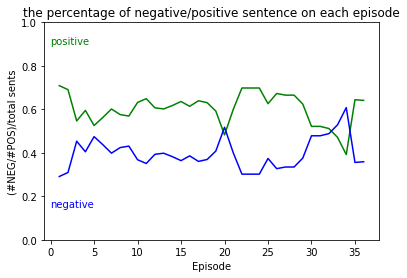

In [178]:
import matplotlib.pyplot as plt

x = [i+1 for i in range(len(evaluation))]
y = [i['(NEG/POS)/total sents'][0] for i in evaluation.values()]
y2 = [i['(NEG/POS)/total sents'][1] for i in evaluation.values()]


plt.ylim(0,1.0)
plt.xlabel('Episode')
plt.ylabel('(#NEG/#POS)/total sents')
plt.title('the percentage of negative/positive sentence on each episode')
plt.plot(x,y, color = 'green')
plt.text(0, 0.90, 'positive', color = 'green')
plt.plot(x,y2, color = 'blue')
plt.text(0, 0.15, 'negative', color = 'blue')

Text(0, 0.88, 'negative')

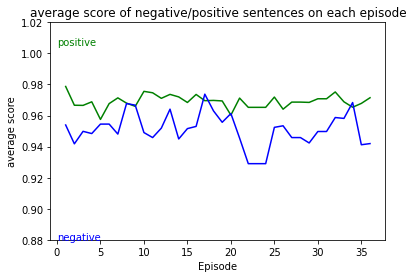

In [179]:
import matplotlib.pyplot as plt

x = [i+1 for i in range(len(evaluation))]
y = [i['average'][0] for i in evaluation.values()]
y2 = [i['average'][1] for i in evaluation.values()]


plt.ylim(0.88,1.02)
plt.xlabel('Episode')
plt.ylabel('average score')
plt.title('average score of negative/positive sentences on each episode')
plt.plot(x,y, color = 'green')
plt.text(0, 1.005, 'positive', color = 'green')
plt.plot(x,y2, color = 'blue')
plt.text(0, 0.88, 'negative', color = 'blue')

**With graphs above, we articulate dynamics of negative/positive context in casts' conversation across episodes. The graph of the percentage of negative/positive sentence on each episode shows increasing trends in negative sentences and slightly decreasing trends in positve sentences. However, these trends volatile across episodes. I hypothesize that even though there does not exist scripts in this show, the director of this show intends to make stories and entertain consumers by selecting what to show.** 